
# __Health Analytics: Decision tree classification.__

<a id="1"></a>

1.   List item

1.   List item

1.   List item

1.   List item

1.   List item

1.   List item

*   List item

*   List item
*   List item


*   List item


2.   List item


2.   List item


2.   List item


2.   List item


2.   List item


2.   List item


***
# __1.Introduction__
***


<a id="2"></a>
## __Data dictionary__
### This is a brief description of the dataset, including what columns it has and what they mean.
### The structure of this section is as follows: The column name is on the left of the colon (:) and the column description is on the right. For example, to show that column x means means y, we would show it as "x : y".
<br>

*   #### __Age__: Age of the patient (of type integer).
*   #### __Gender__: Gender of the patient (has values "Male," "Female," and "Other").
*   #### __Hypertension__: Indicates if the patient has hypertension (0 for No, 1 for Yes).
*   #### __Heart Disease__: Indicates if the patient has a heart disease (0 for No, 1 for Yes).
*   #### __Ever Married__: Whether the patient has ever been married ("No" or "Yes").
*   #### __Work Type__: Type of work the patient is engaged in ("Children," "Govt_job," "Never_worked," "Private," or "Self-employed").
*   #### __Residence Type__: Type of residence of the patient ("Rural" or "Urban").
*   #### __Average Glucose Level__: Average glucose level in the patient's blood.
*   #### __BMI__: Body Mass Index (BMI) of the patient.
*   #### __Smoking Status__: Smoking status of the patient ("formerly smoked," "never smoked," "smokes," or "Unknown").
*   #### __The Target column: Stroke__: Indicates if the patient had a stroke (1 for Yes, 0 for No).











## __Problem statement__ <br>
### Stroke is a serious health problem where a blood vessel, carrying oxygen and nutrients to the brain gets blocked or bursts. At one point, according to the World Health Organization (WHO), stroke was the second leading cause of death worldwide.

## __Objective of the analysis__

### The objective of this project is to build and analyse a machine learning model using the Decision Trees algorithm to predict whether a patient is likely to get a stroke. This prediction is done based on the input variables described in the data dictionary section.

## **Table of Contents**
- [Introduction](#1)
  * [Data Dictionary](#2)
  * [Problem statement](#3)
  * [Objective of the analysis](#4)
  * [Table of Contents](#5)


- [Imports](#7)
  * [Importing libraries](#9)
  * [Loading Dataset](#9)
  * [Dataset Overview](#9)
  
- [Exploratory Data Analysis (EDA)](#10)
  * [Dataset Overview (Continued)](#9)
  * [Visualizations](#9)
    * [(i) Univariate Analysis](#9)
    * [Bivariate Analysis](#9)
    * [Correlation Analysis](#9)
  * [Missing Values](#9)
- [Preprocessing](#10)
  * [Removing unecessary columns](#9)

  * [Handling Missing Values](#9)
  * [Feature Engineering](#9)
  * [Encoding Categorical Variables](#9)
  * [Feature Scaling](#9)
  * [Data Splitting](#9)
- [Modelling](#10)
  * [Model Training](#9)
  * [Model Evaluation](#9)
  * [Hyperparameter Tuning](#9)
- [Conclusion](#10)


















***
# __2. Imports__
***

## __Importing libraries__

### Here we import the python libraries that we will be using to for all the steps outlined in the table of contents above including EDA, pre-processing, predictive modelling, evaluation and hyper-parameter tuning.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, recall_score, roc_curve, roc_auc_score,f1_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import  plot_tree

##__Loading Dataset__
### The funciton "read_csv" from the pandas library is used to import the dataset .
### The DataFrame that contains the dataset is "df".

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## __Dataset Overview__
### This an overview of the dataframe where we see what the data, as described in the "data dictionary" section above, in a tabular format

In [ ]:
df.sample(5)

id  gender   age  hypertension  heart_disease ever_married  \
1583  69792  Female  37.0             0              0          Yes   
1541  57917  Female  47.0             0              0          Yes   
5041  44878    Male  53.0             0              0          Yes   
735   52808    Male  73.0             0              0          Yes   
1923  44177  Female  60.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi smoking_status  \
1583       Govt_job          Urban              65.29  32.9   never smoked   
1541        Private          Urban             157.01  26.1         smokes   
5041        Private          Rural             175.92  26.9         smokes   
735         Private          Urban              84.11  27.9   never smoked   
1923  Self-employed          Rural              68.96  30.8        Unknown   

      stroke  
1583       0  
1541       0  
5041       0  
735        0  
1923       0

***
# __3. Exploratory Data Analysis (EDA)__
***

#### The purpose of this section is to gain more understanding of the dataset by exploration as shown in the following sections.

#__Dataset Overview (Continued)__
### This is our initial step in the EDA where we take a look at the structure and statistical characteristics of the data . We do this by continuing to take an overview of the dataset by looking at the shape (to see the number of rows and columns), data types (this is to see weather each column contains numerical or categorical values), and the discriptive statistics (to get to understand the distribution of the data).






In [ ]:
#Getting the shape of the dataset
print(f"The number of rows or entries is: {df.shape[0]}")
print(f"The number of columns is : {df.shape[1]}")

The number of rows or entries is: 5110
The number of columns is : 12


In [ ]:
#Getting the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#Getting the descriptive satistics to understand the distribution of the data
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

# __Visualizations__




#### This sub-section is important for revealing insights and possible parttens in the data. We include this section because we want to move from having raw data to having a clear picture of all the variables of and the data as a whole. We include various types of analyses, including univariate analysis, bivariate analysis, and correlation analysis, each serving a distinct purpose as described below:



> ## __(i) Univariate Analysis__


> #### Univariate analysis is the technique of analyzing the the characteristics of a single variable. Here we get insights on what unique values (if they are categorical) and how often do they occur for each column. If they are numerical, we get insights on how are they distributed and this is done with the use of histograms and box plots (to check for outliers). The box plots are only done for numeric variables. For categorical variables, we use the histograms.





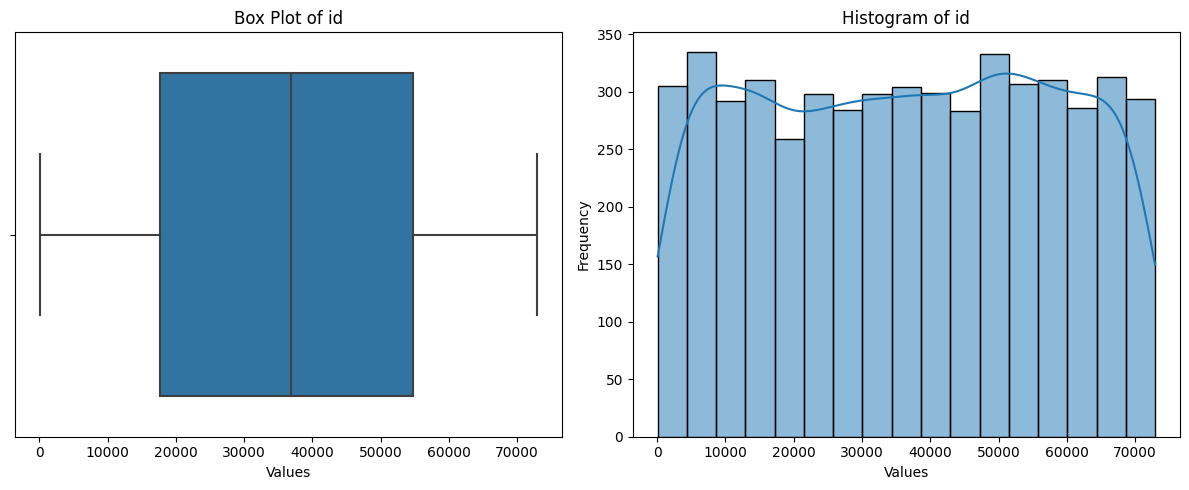

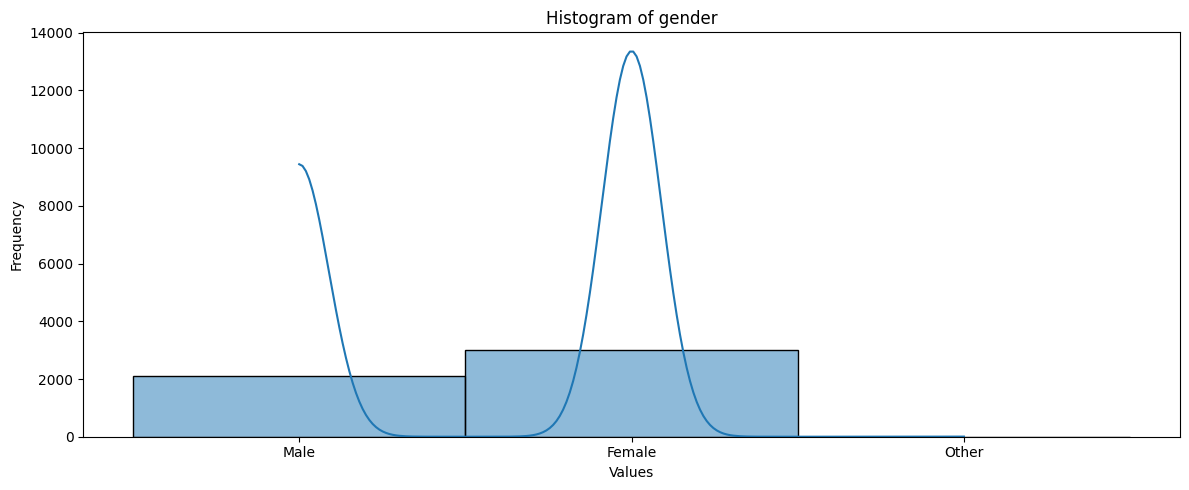

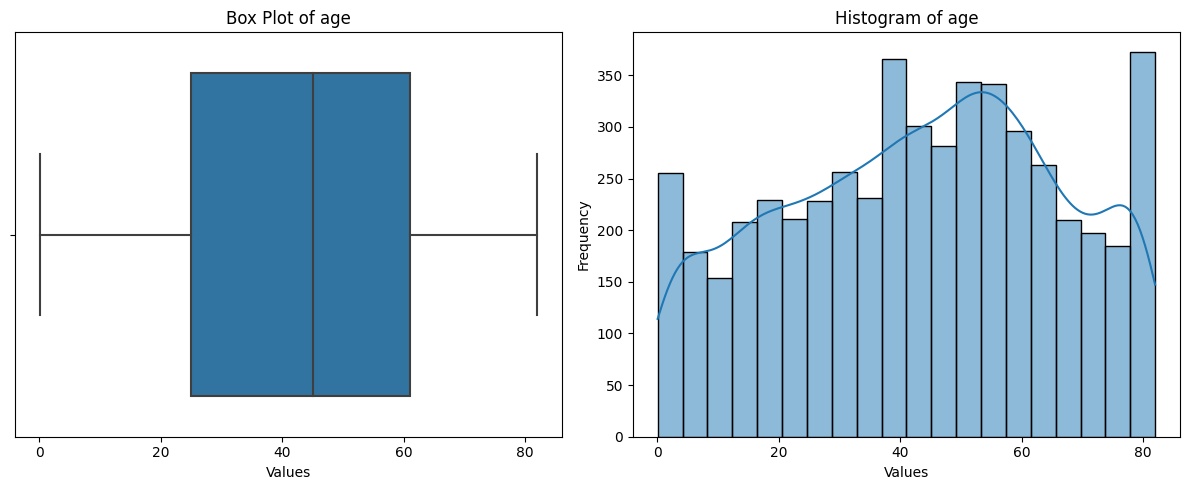

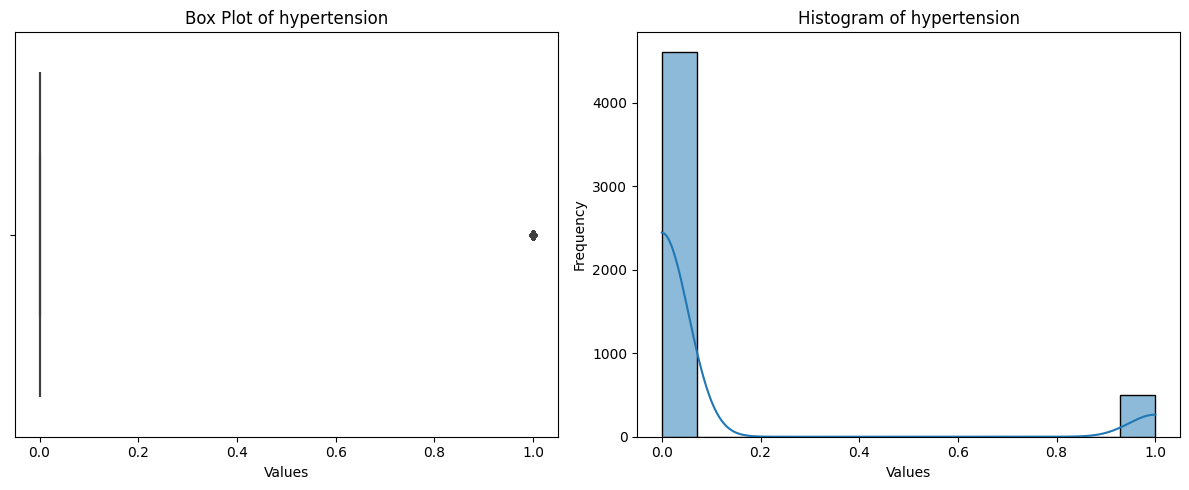

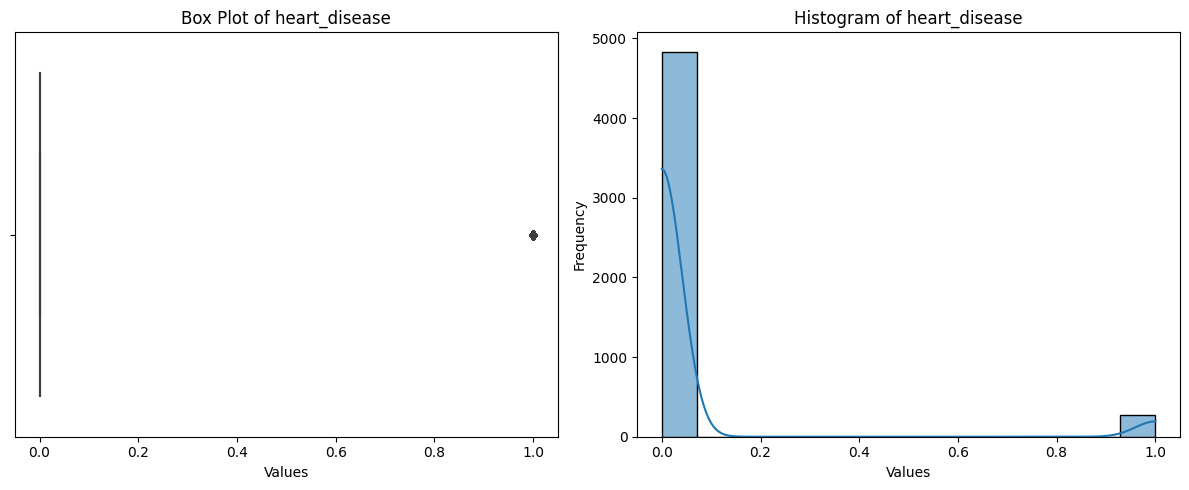

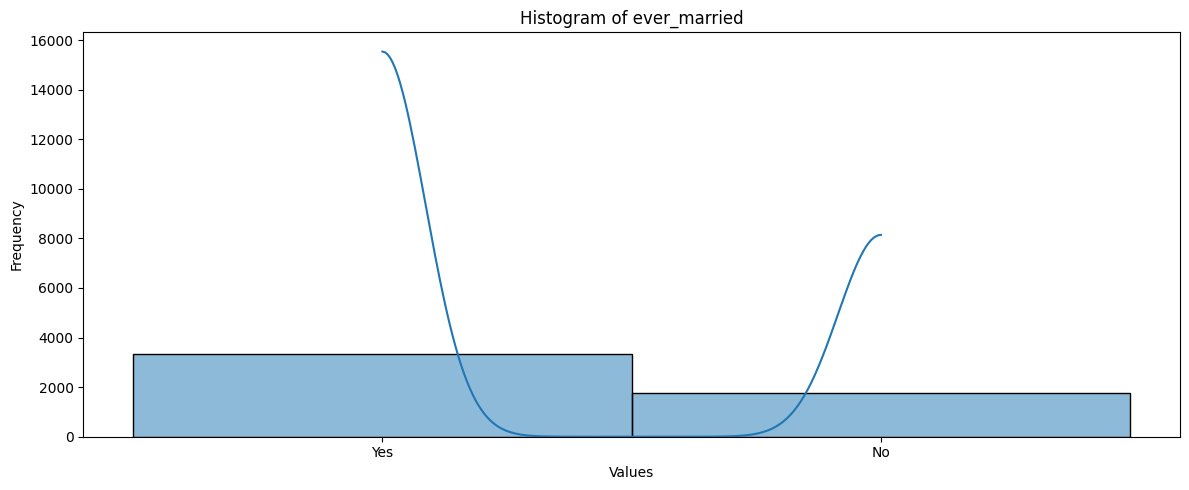

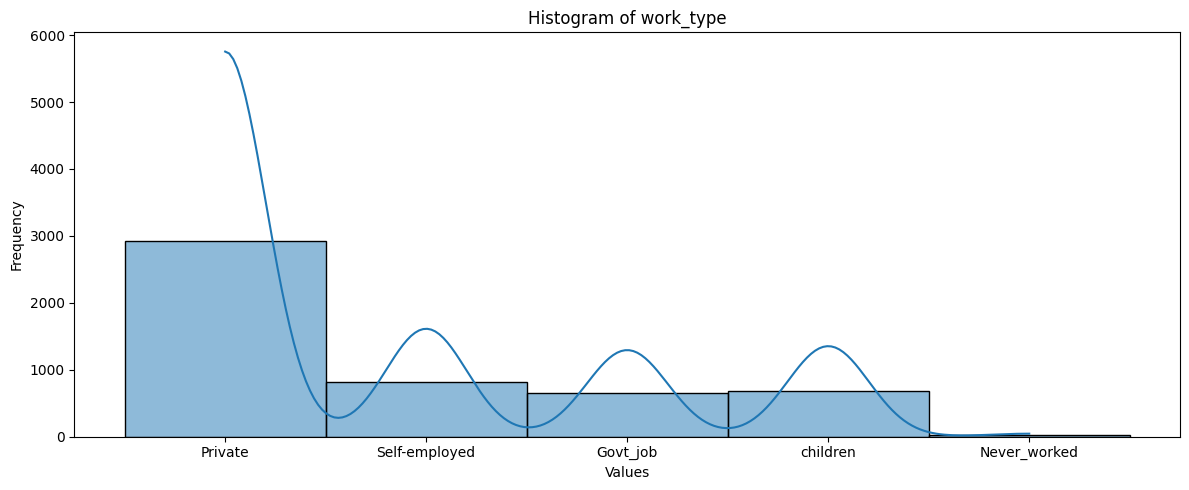

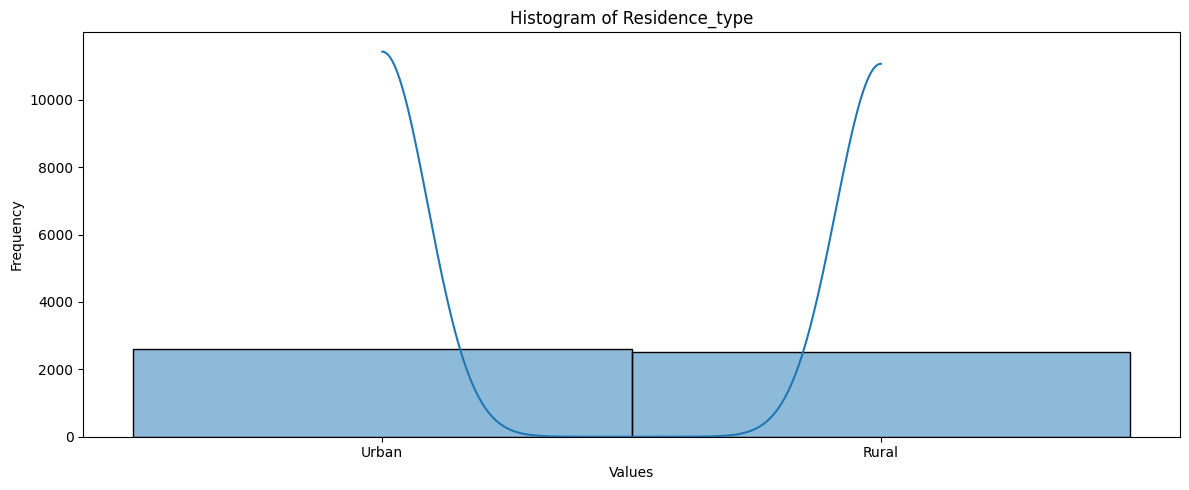

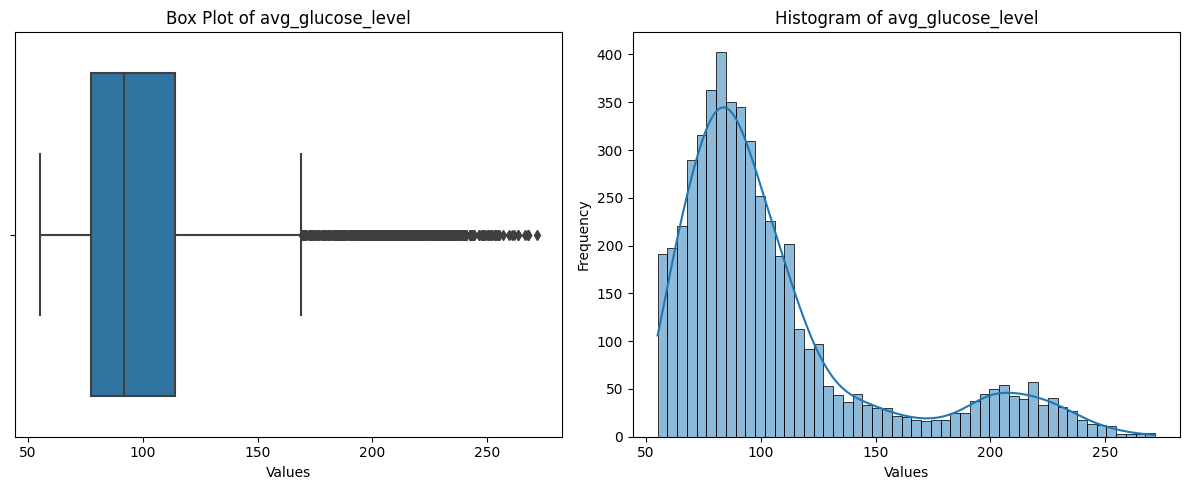

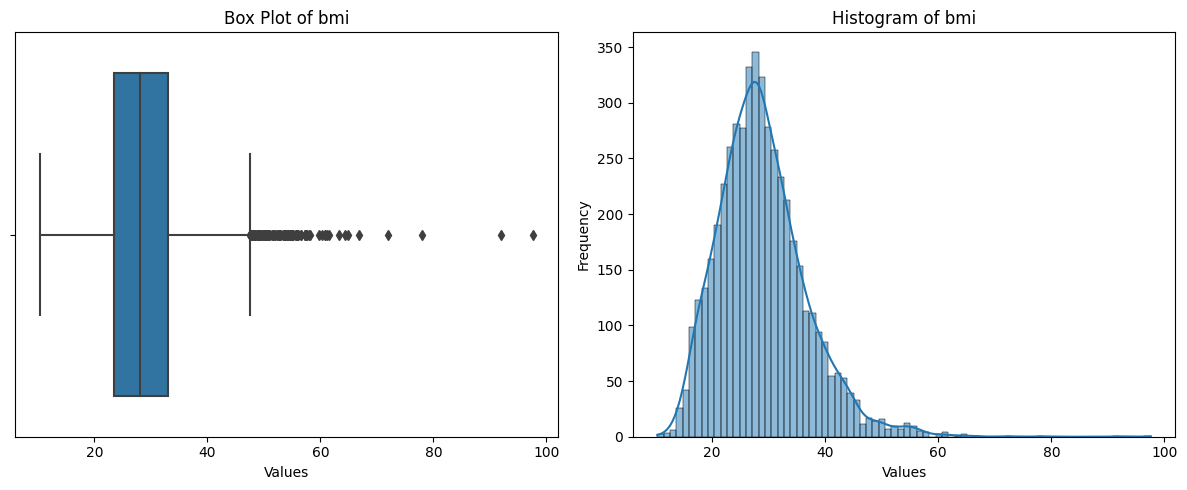

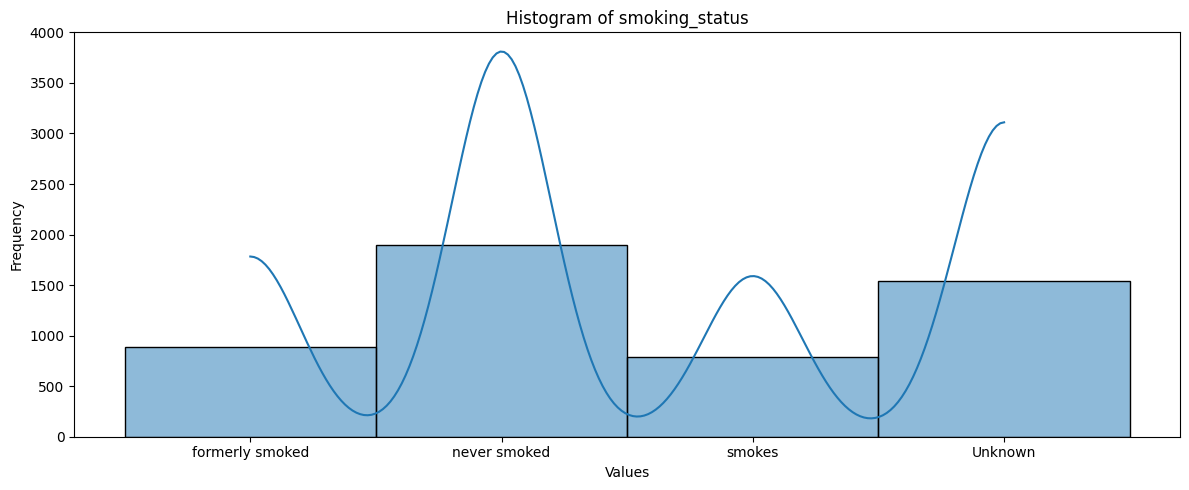

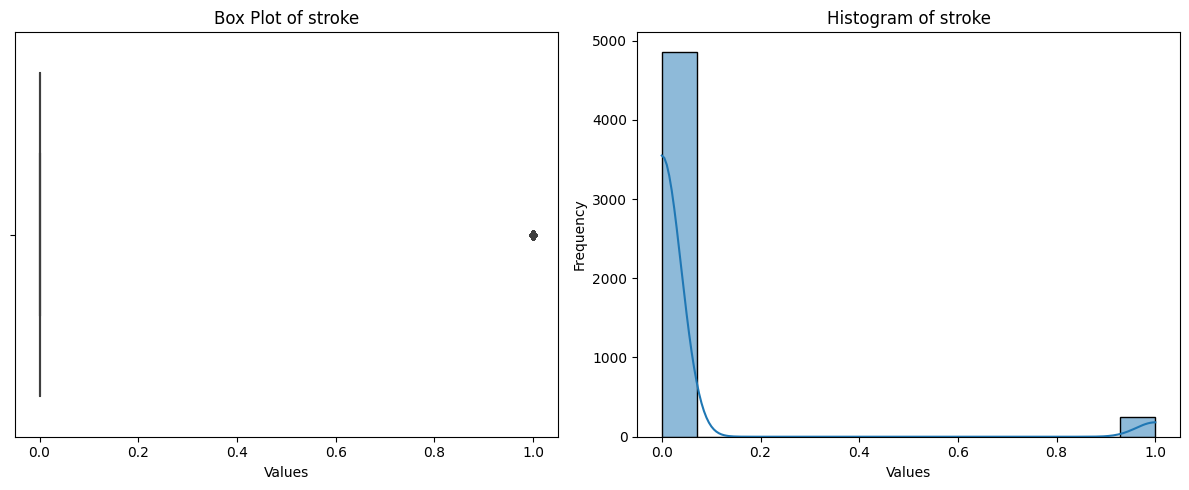

In [ ]:
def univariate_ana(df):
    for column in df.columns:
        # Creates a new figure for each column of the dataframe
        plt.figure(figsize=(12, 5))

        if df[column].dtype == 'object':  # This line checks if the column is categorical or not
            # Creates a histogram for the categorical columns
            sns.histplot(data=df, x=column, kde=True)
            plt.title(f'Histogram of {column}')
            plt.xlabel('Values')
            plt.ylabel('Frequency')
        else:
            # Creates a box plot for the numeric columns
            plt.subplot(1, 2, 1)
            sns.boxplot(data=df, x=column)
            plt.title(f'Box Plot of {column}')
            plt.xlabel('Values')

            # Creates a histogram for the numeric columns
            plt.subplot(1, 2, 2)
            sns.histplot(data=df, x=column, kde=True)
            plt.title(f'Histogram of {column}')
            plt.xlabel('Values')
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()
        print()

univariate_ana(df)




> ## __(ii) Bivariate Analysis__



#### Here we continue our visualization by looking at relationships between pairs of variables. We do this so we see the variable sthat may influence the target variable. This is done plotting Scatter plots for continuous vs continuous variables, Box plots for continuous vs categorical variables, and  Stacked bar plots for categorical vs categorical variables.

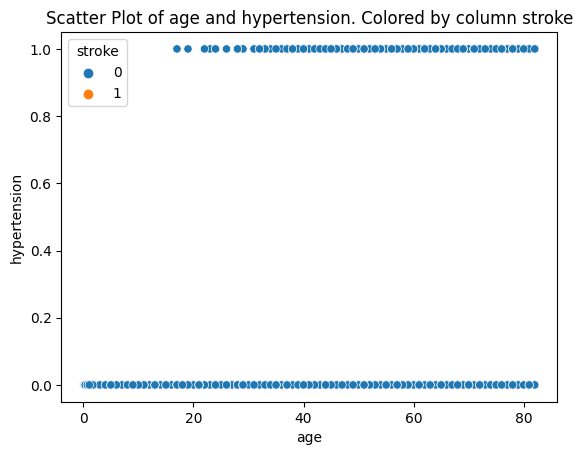

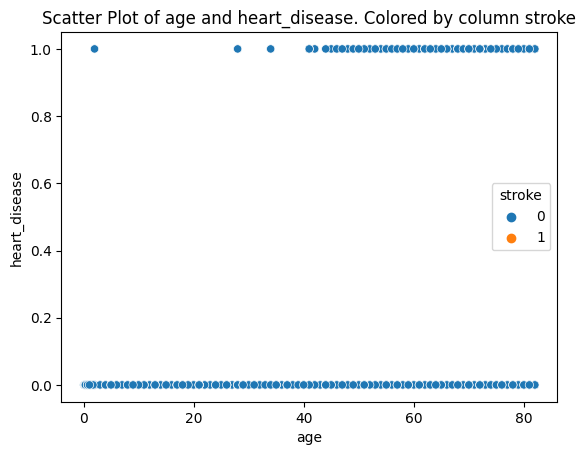

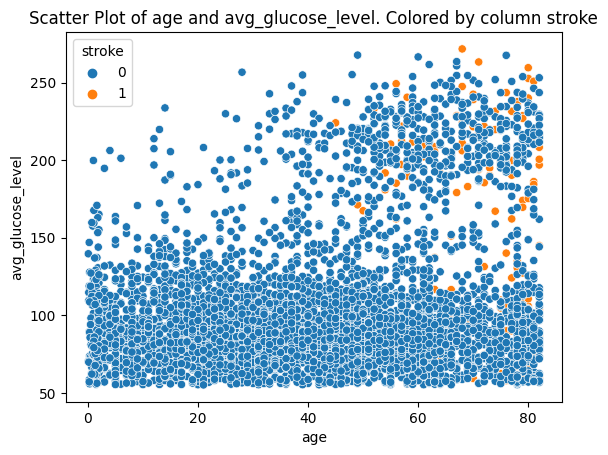

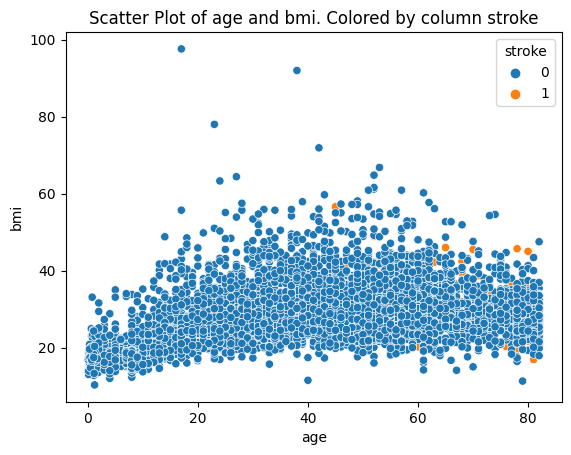

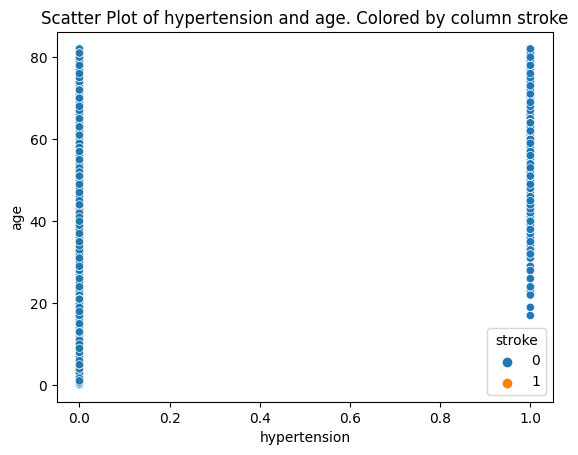

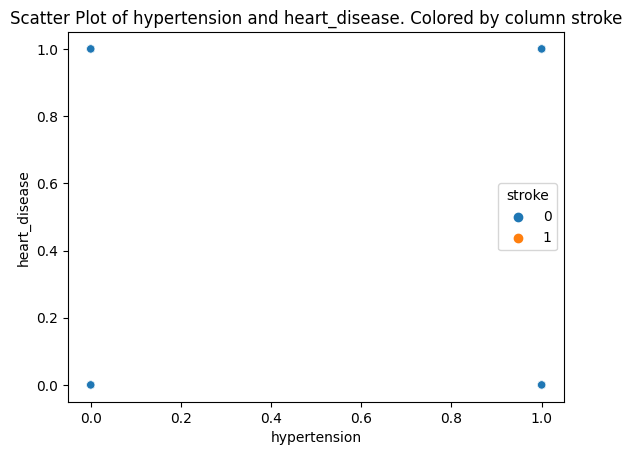

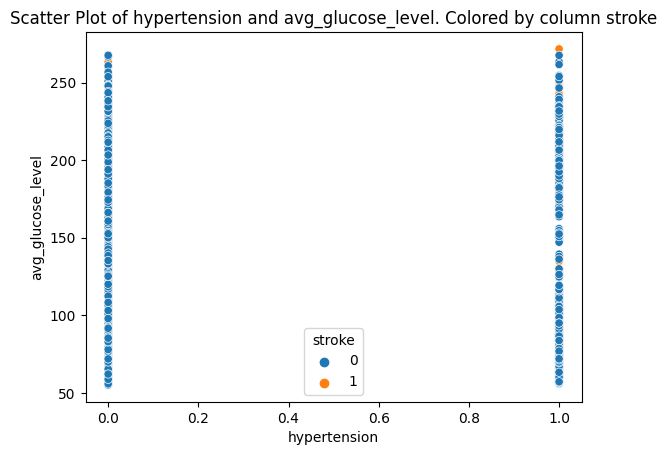

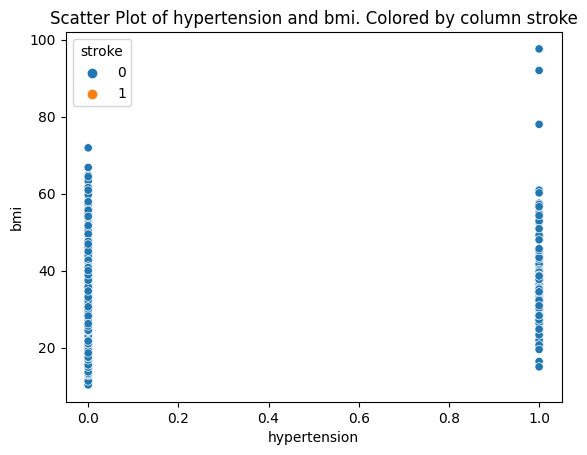

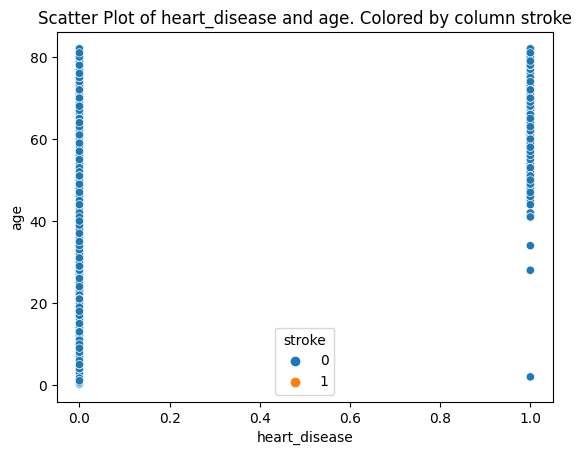

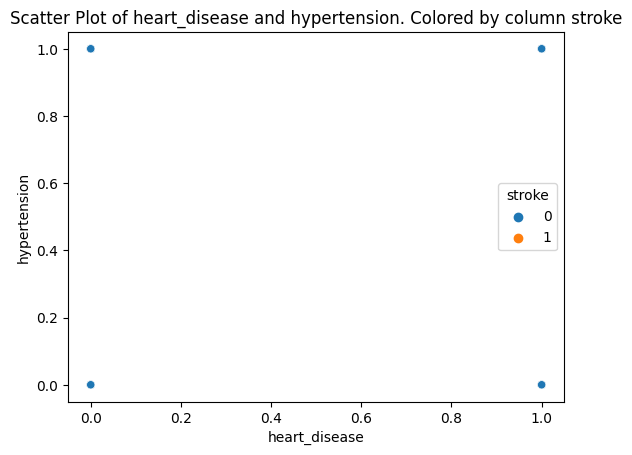

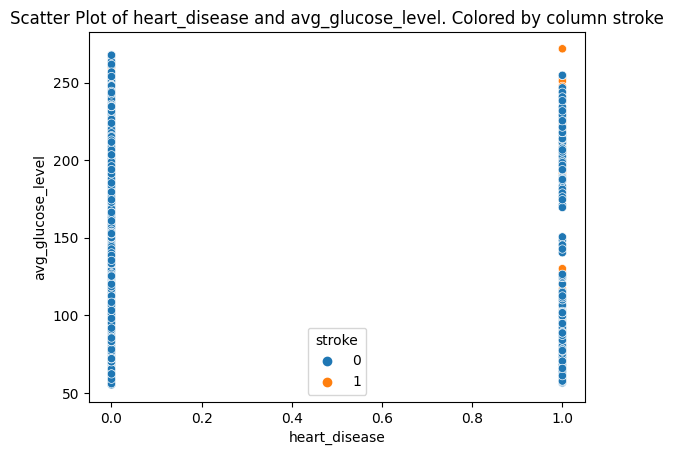

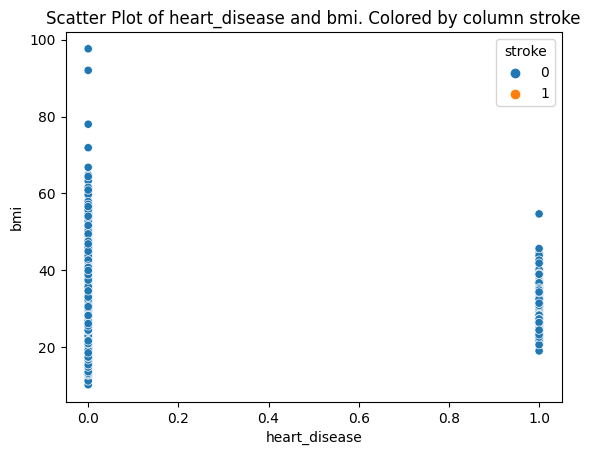

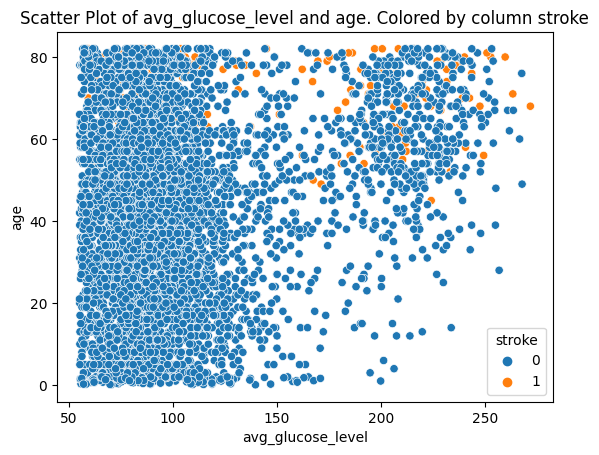

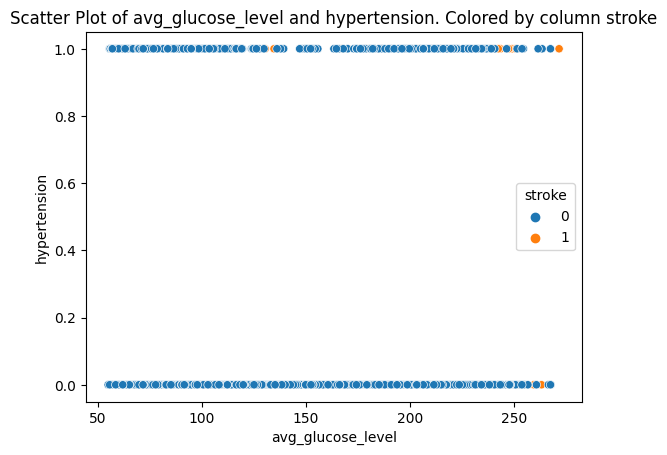

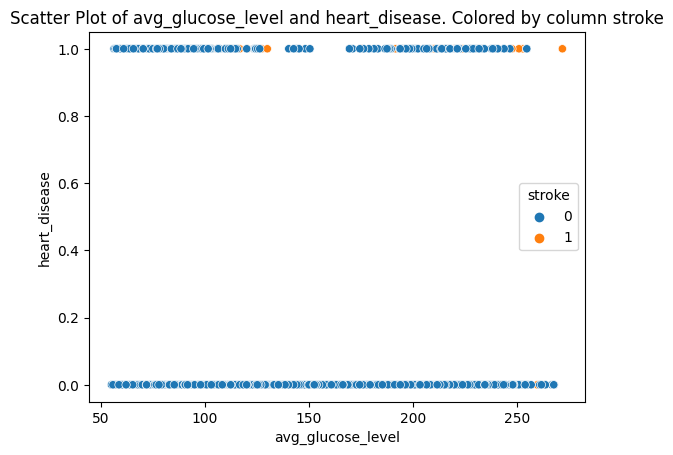

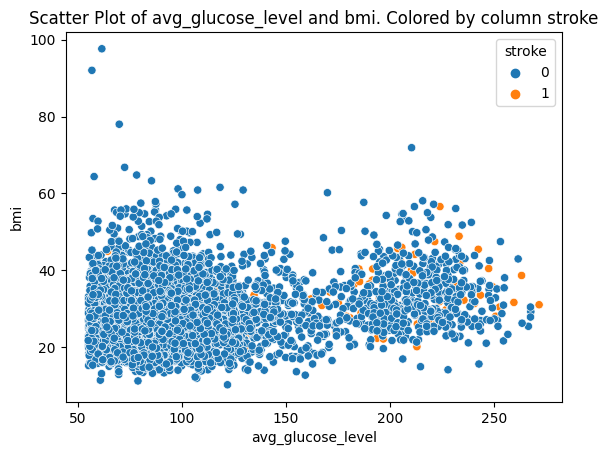

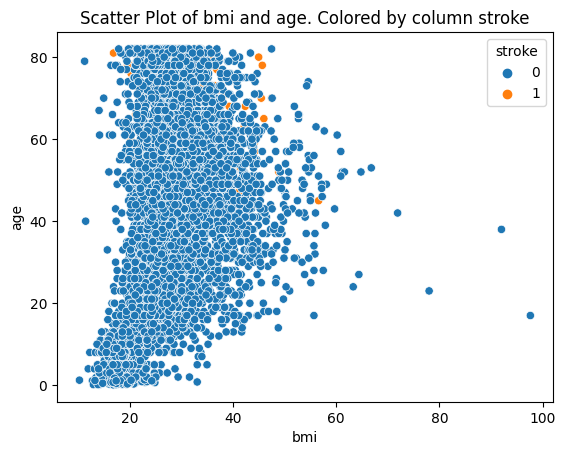

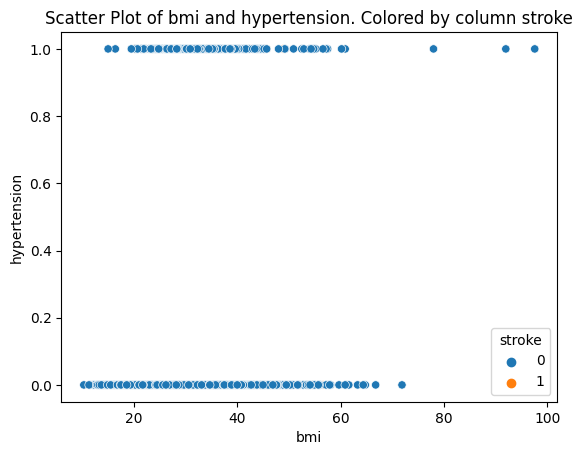

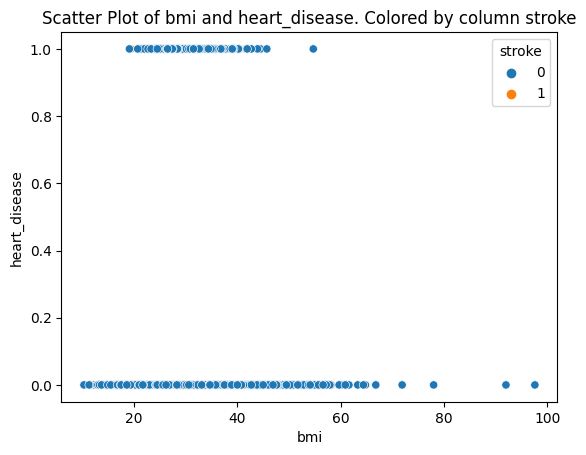

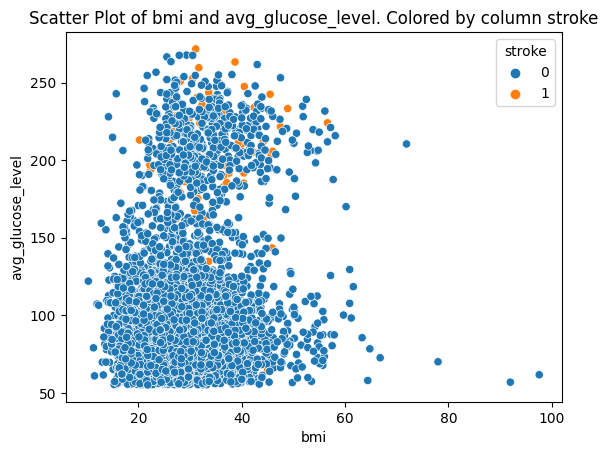

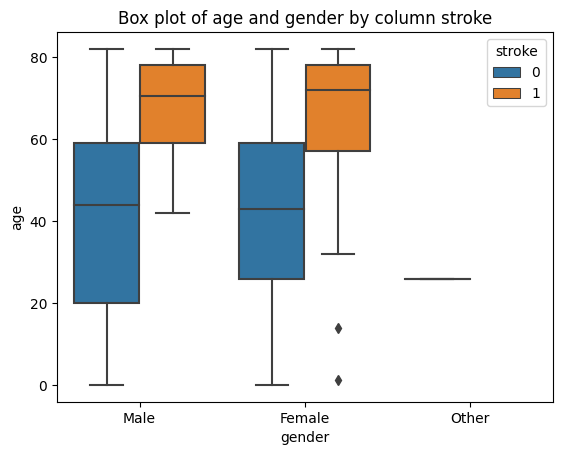

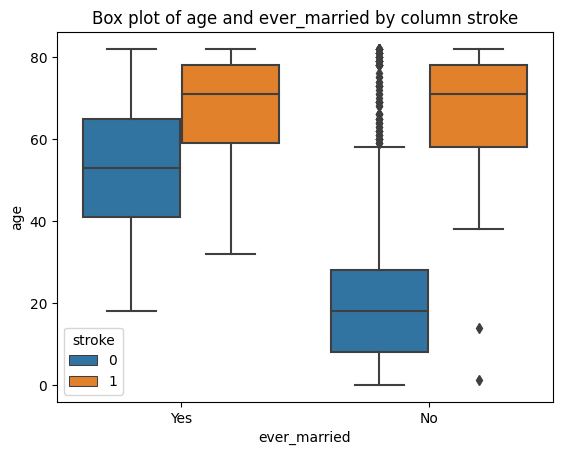

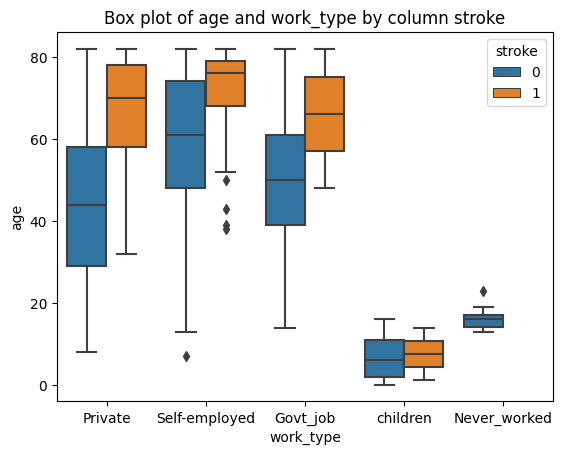

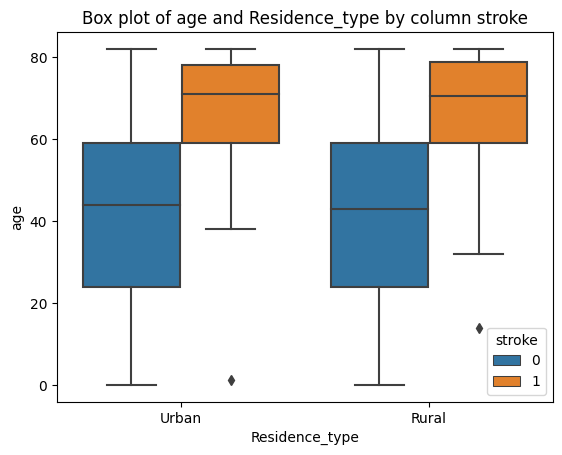

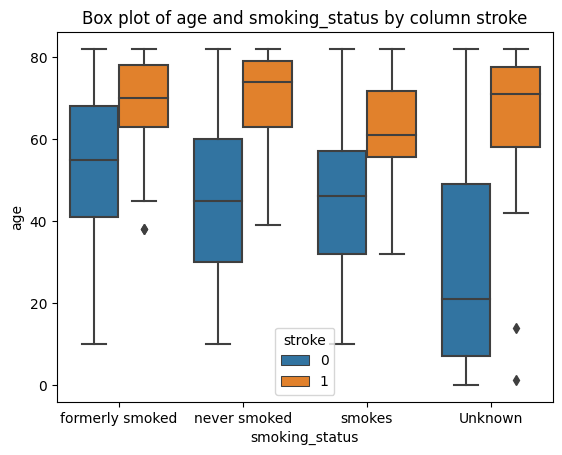

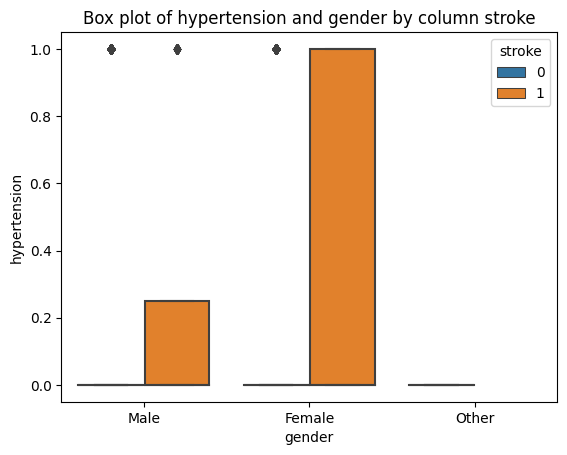

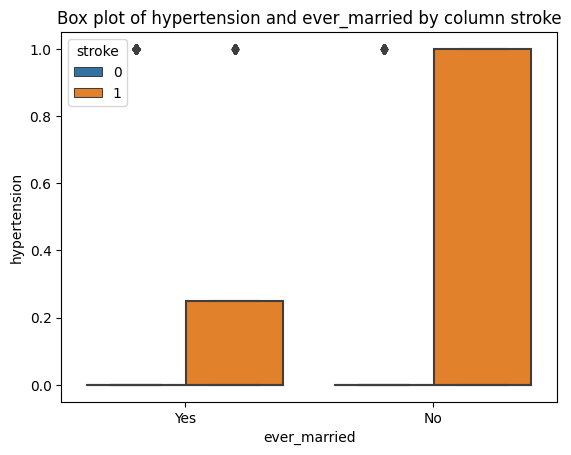

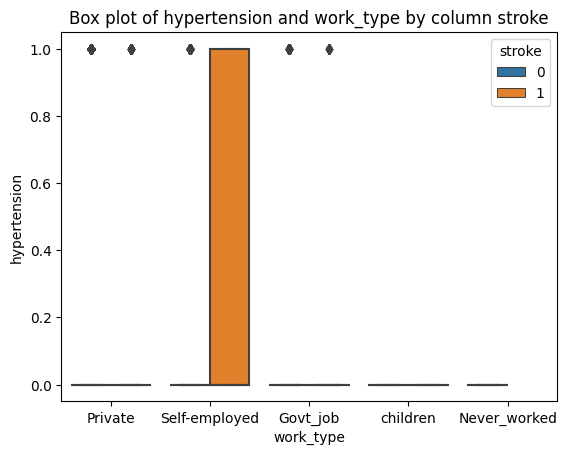

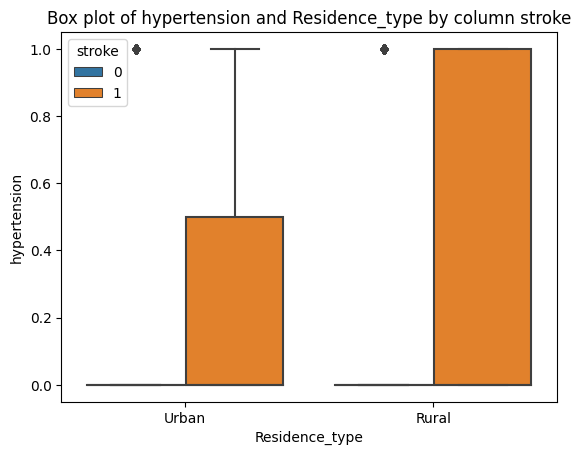

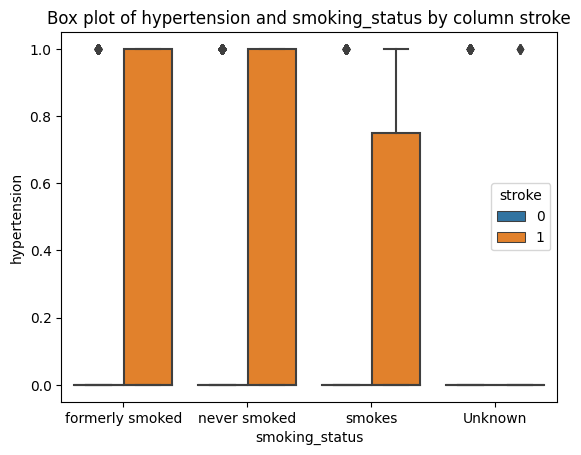

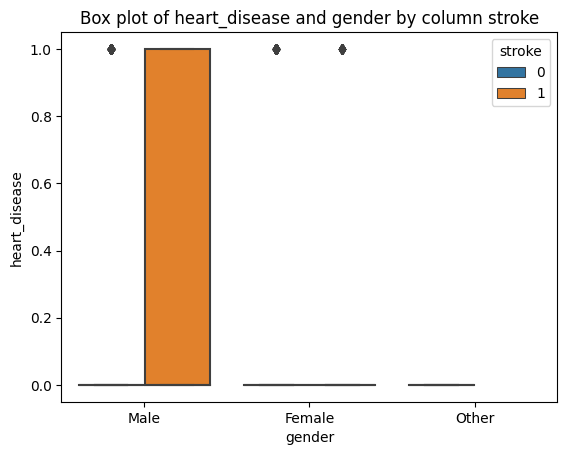

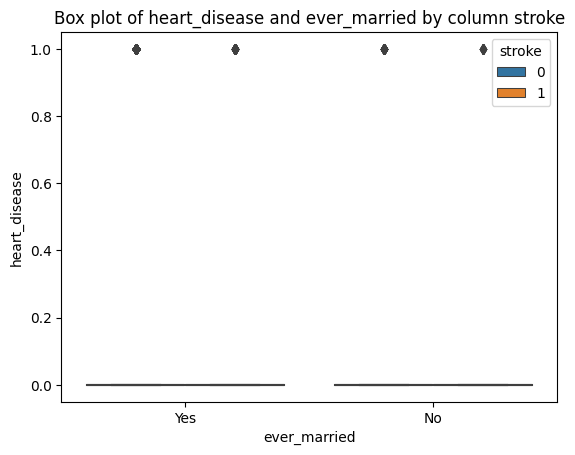

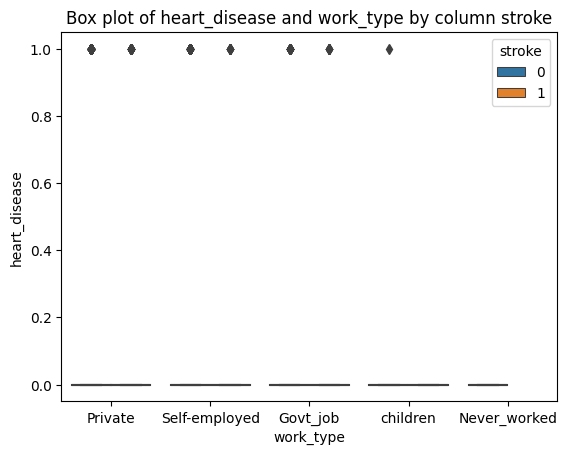

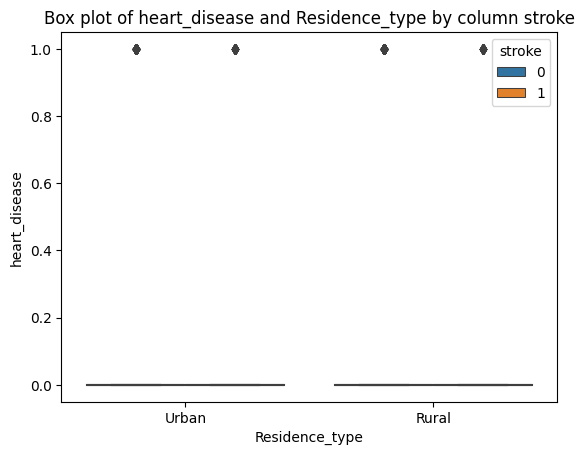

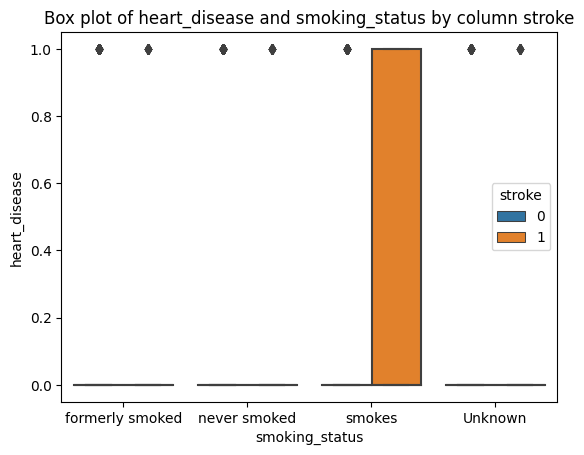

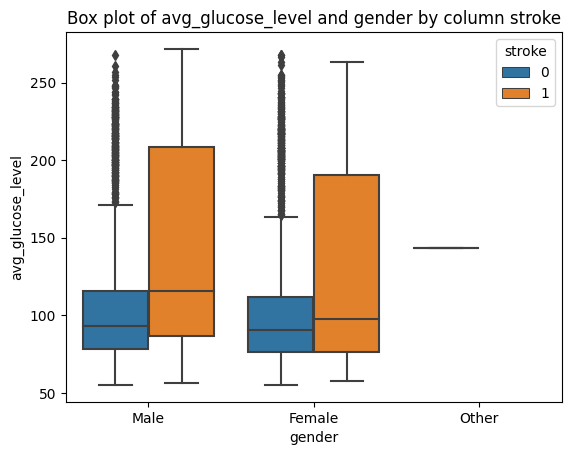

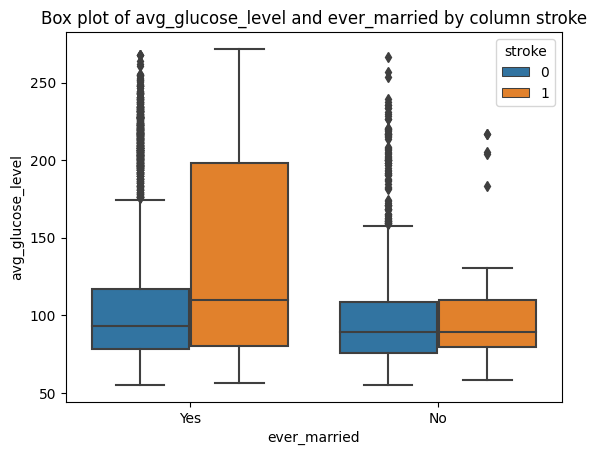

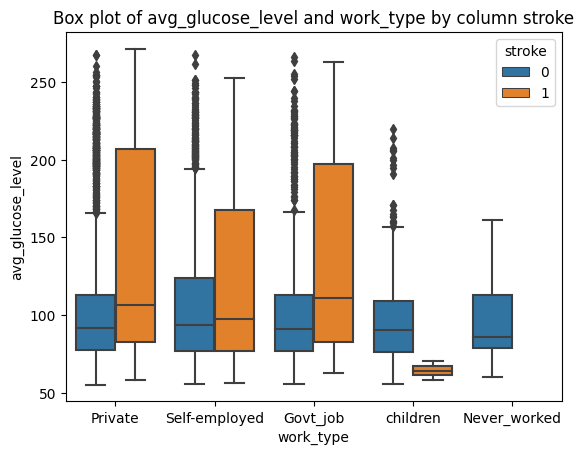

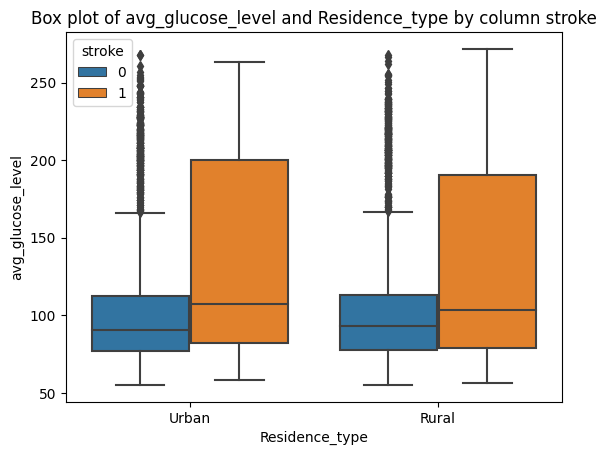

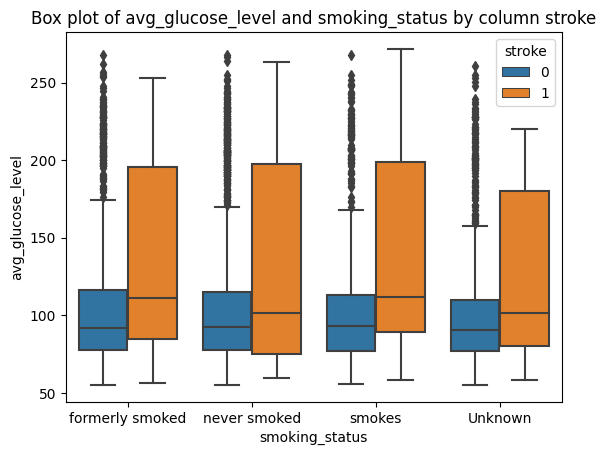

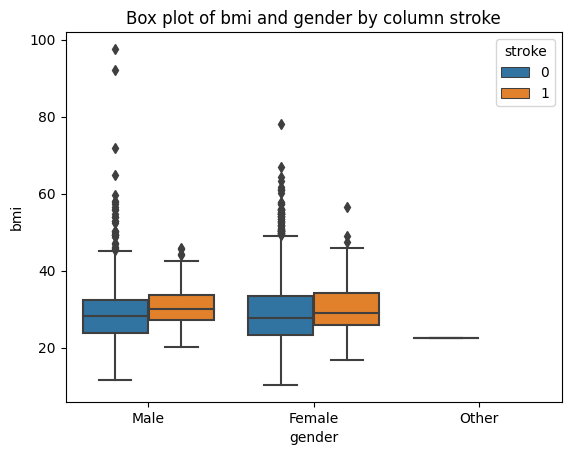

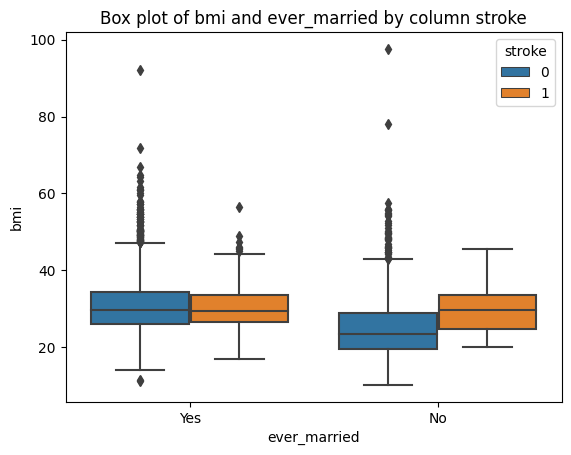

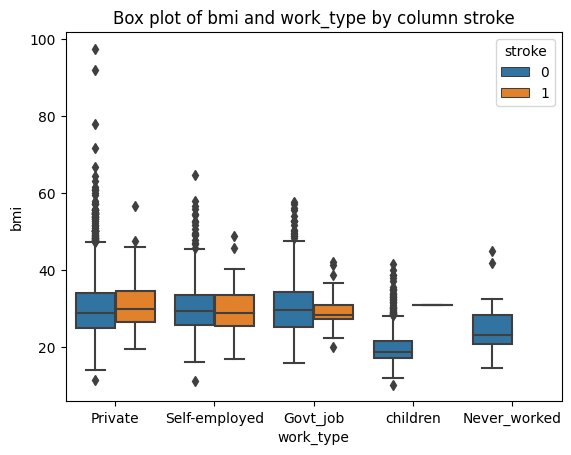

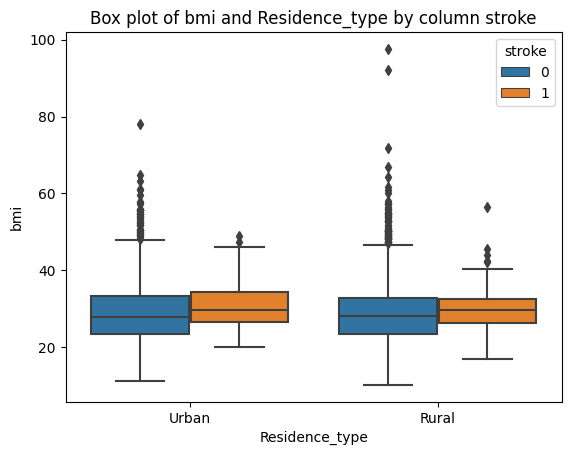

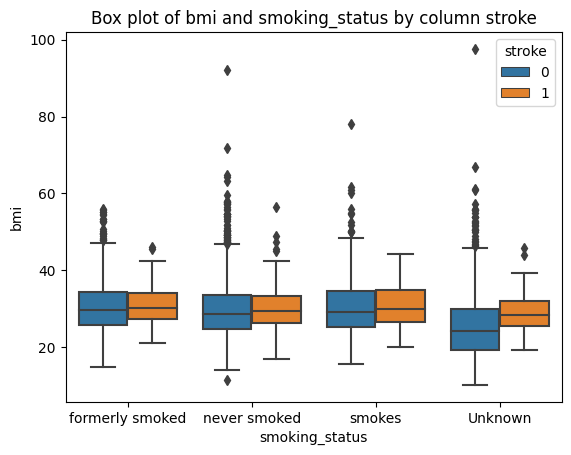

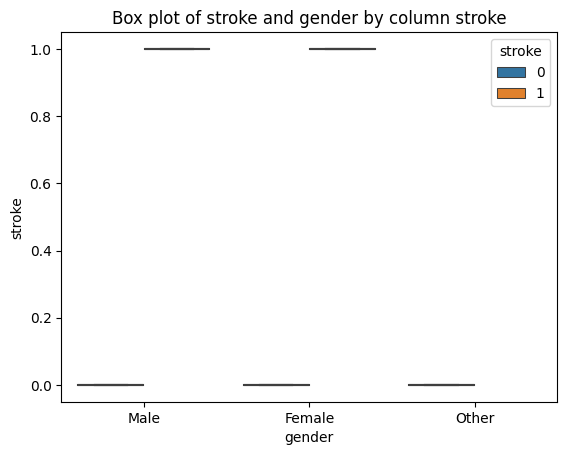

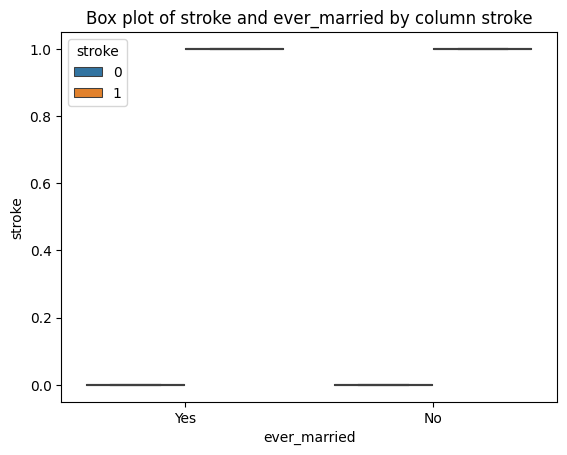

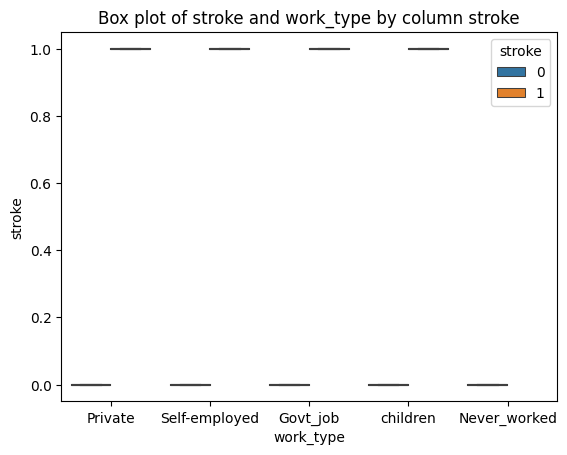

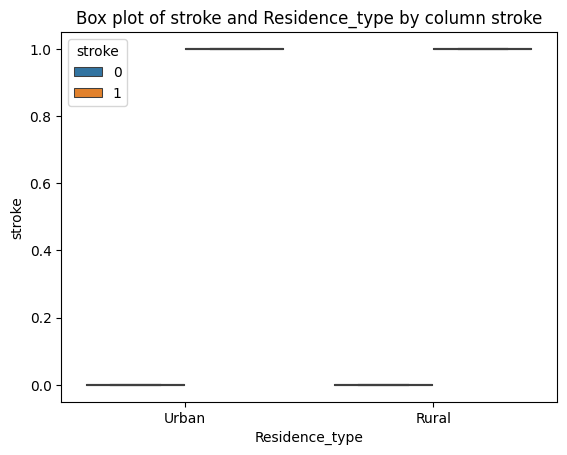

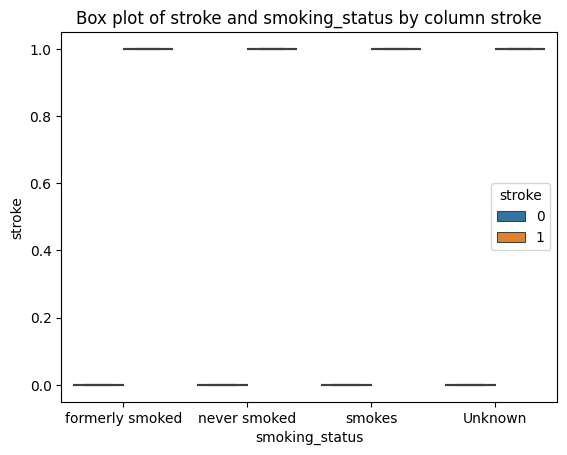

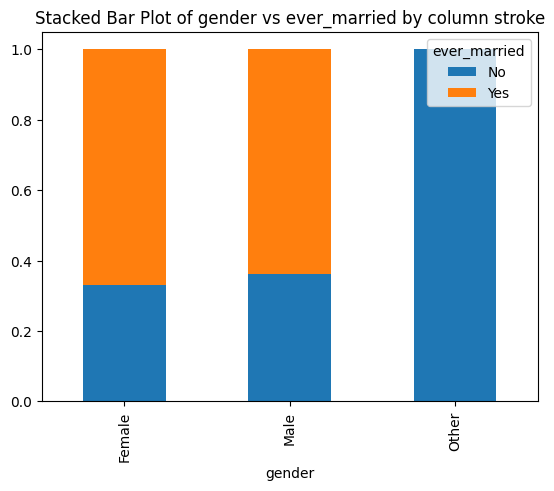

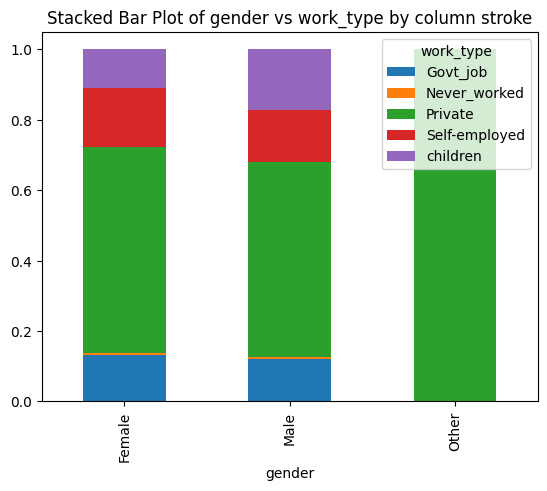

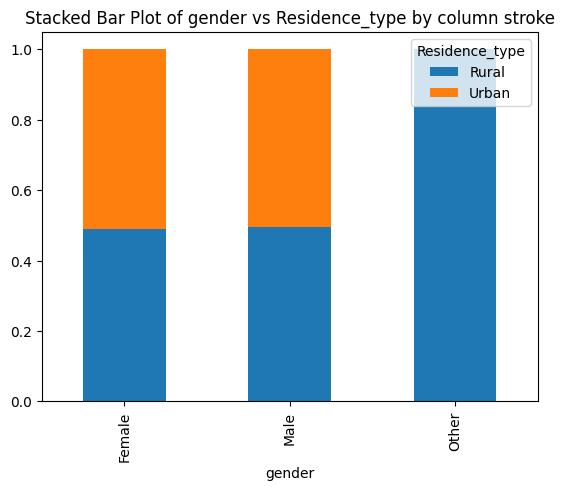

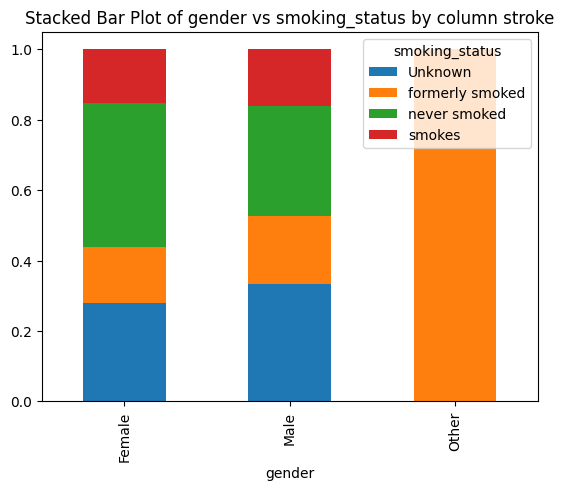

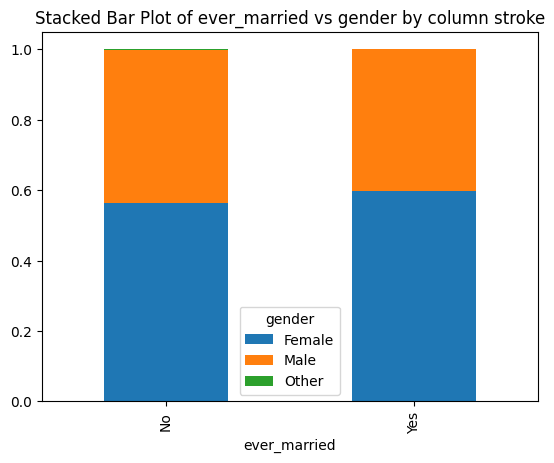

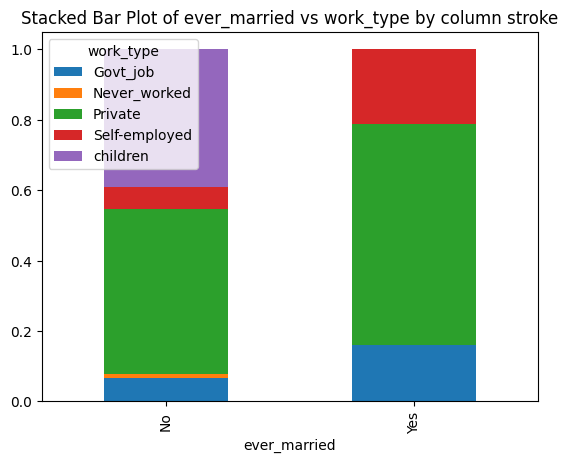

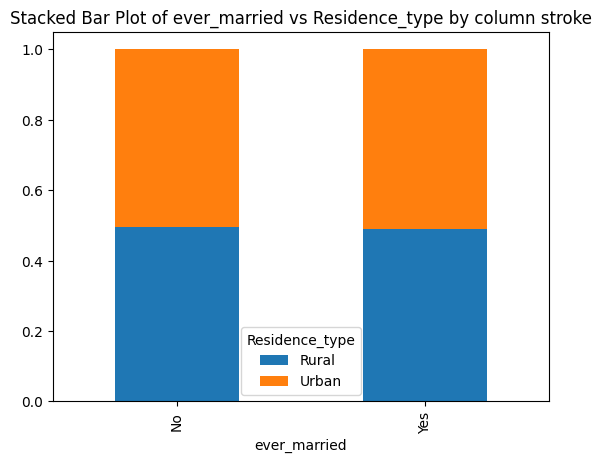

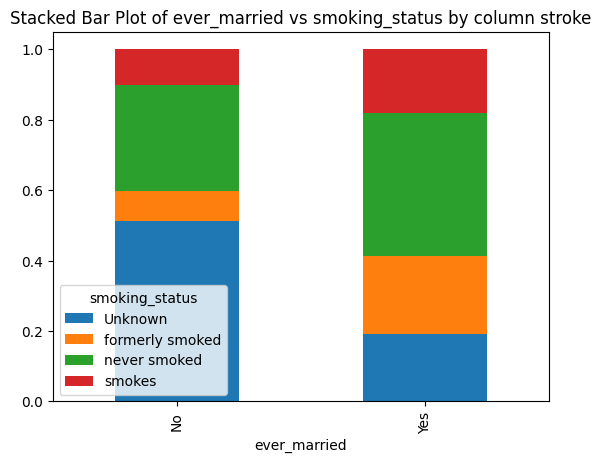

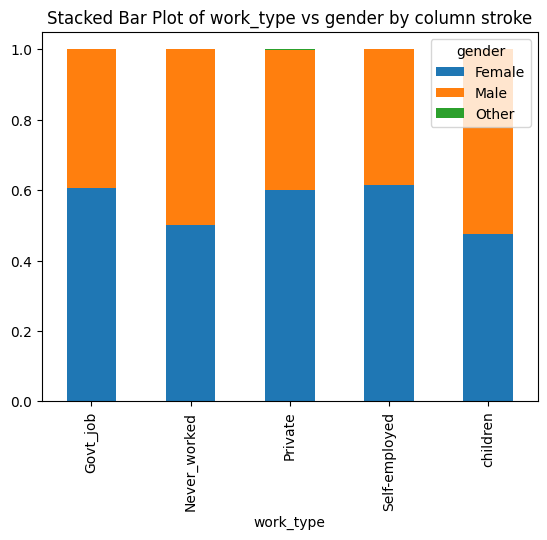

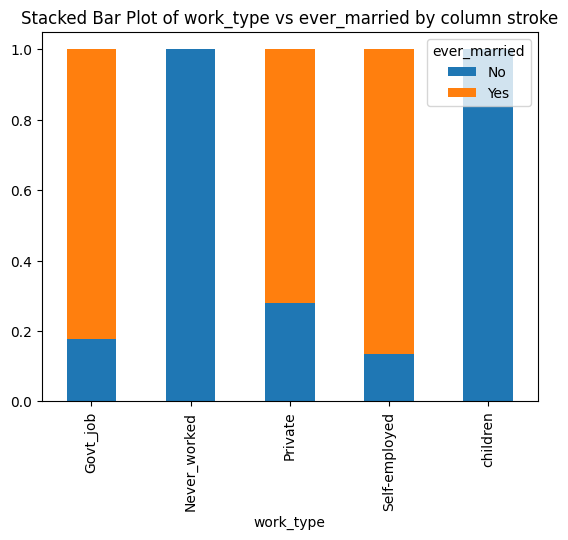

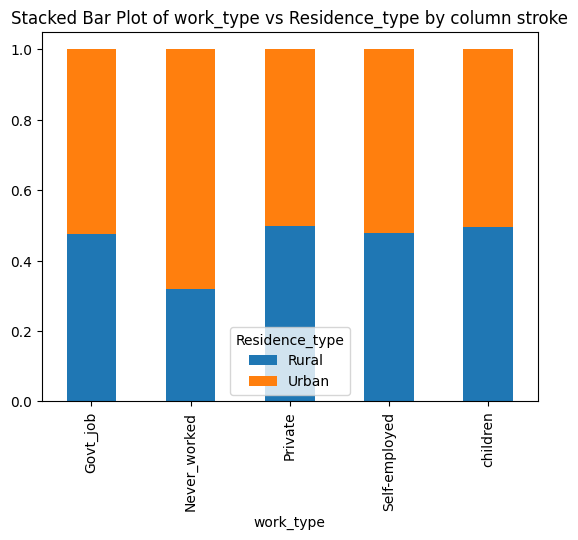

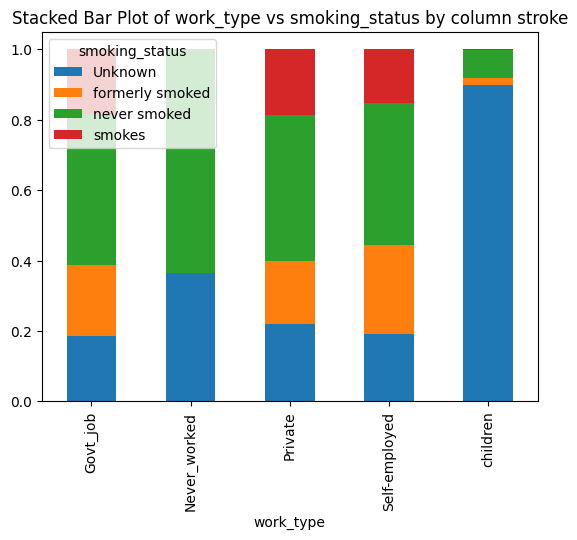

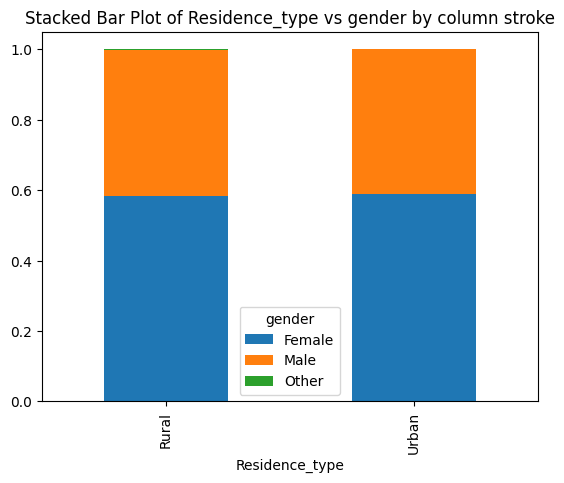

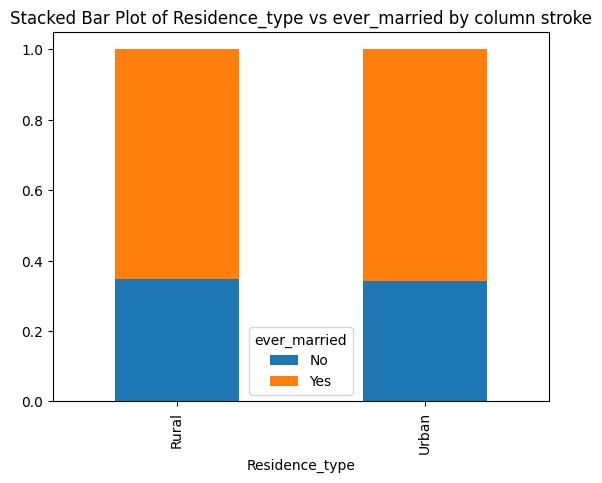

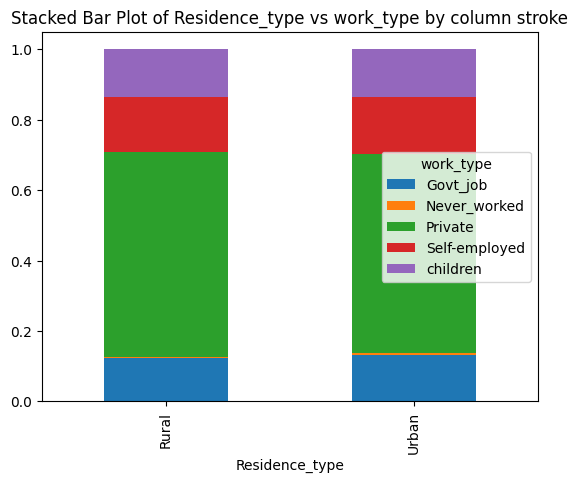

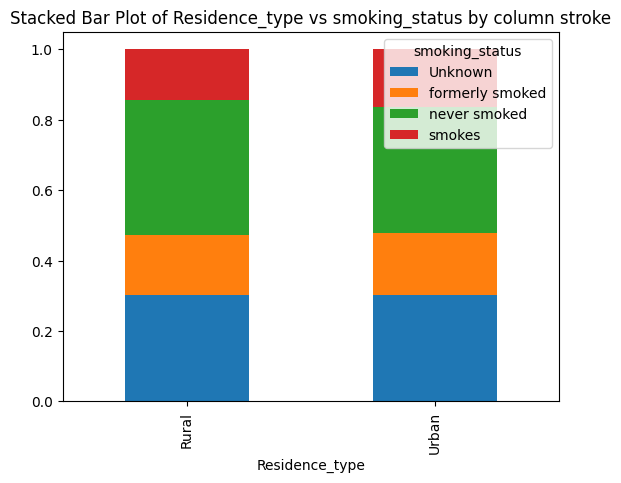

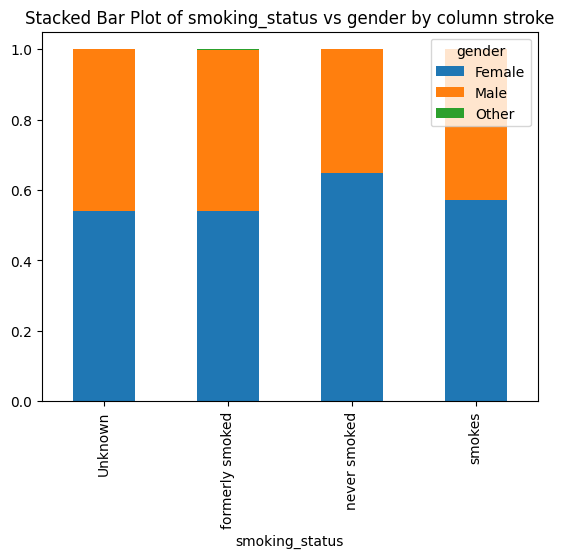

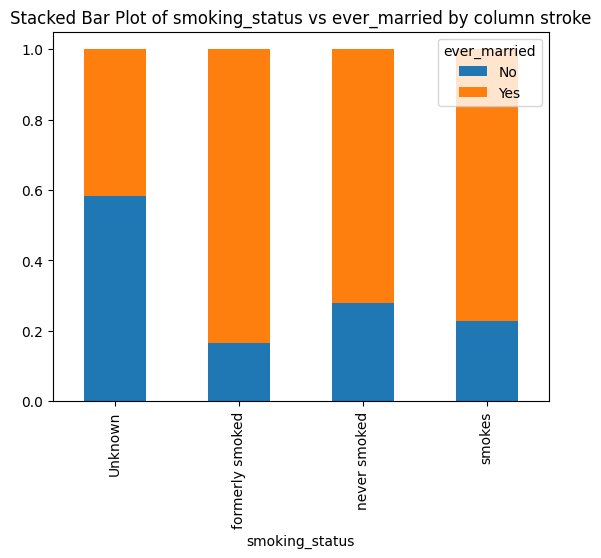

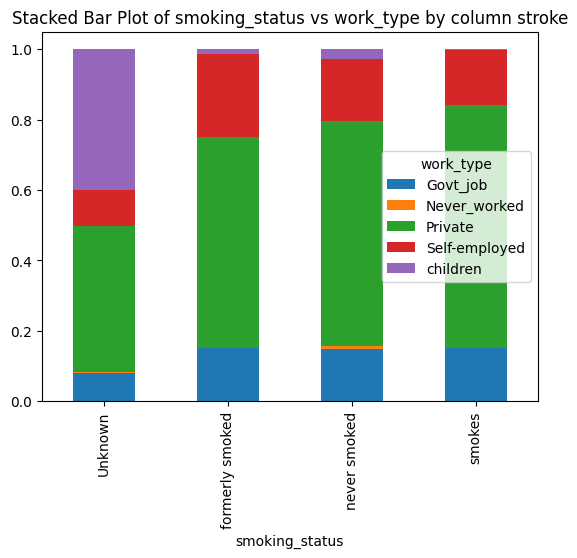

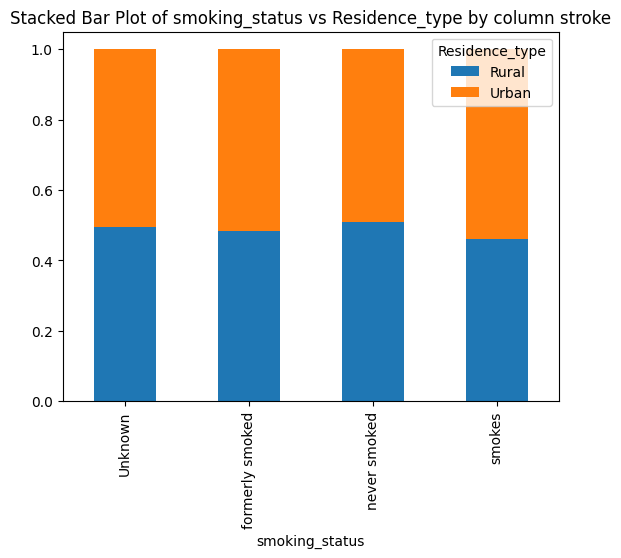

In [ ]:


def bivariate_ana(df, target_column):
    # Exclude the "id" column from continuous variables
    continuous_vars = df.select_dtypes(include='number').drop(columns=['id'])

    # Scatter plots for continuous vs continuous variables
    for x_column in continuous_vars.columns:
        for y_column in continuous_vars.columns:
            if x_column != target_column and y_column != target_column and x_column != y_column:
                sns.scatterplot(data=df, x=x_column, y=y_column, hue=target_column)
                plt.title(f'Scatter Plot of {x_column} and {y_column}. Colored by column {target_column}')
                plt.show()
                print()

    # Box plots for continuous vs categorical variables (excluding target column)
    categorical_vars = df.select_dtypes(exclude='number')
    for x_column in continuous_vars.columns:
        for cat_column in categorical_vars.columns:
            if cat_column != target_column:
                sns.boxplot(data=df, x=cat_column, y=x_column, hue=target_column)
                plt.title(f'Box plot of {x_column} and {cat_column} by column {target_column}')
                plt.show()
                print()

    # Stacked bar plots for categorical vs categorical variables
    for cat_column1 in categorical_vars.columns:
        for cat_column2 in categorical_vars.columns:
            if cat_column1 != target_column and cat_column2 != target_column and cat_column1 != cat_column2:
                contingency_table = pd.crosstab(df[cat_column1], df[cat_column2])
                stacked_data = contingency_table.div(contingency_table.sum(1).astype(float), axis=0)
                stacked_data.plot(kind='bar', stacked=True)
                plt.title(f'Stacked Bar Plot of {cat_column1} vs {cat_column2} by column {target_column}')
                plt.show()
                print()

# Example usage:
bivariate_ana(df, target_column='stroke')



> ## __(iii) Correlation Analysis__




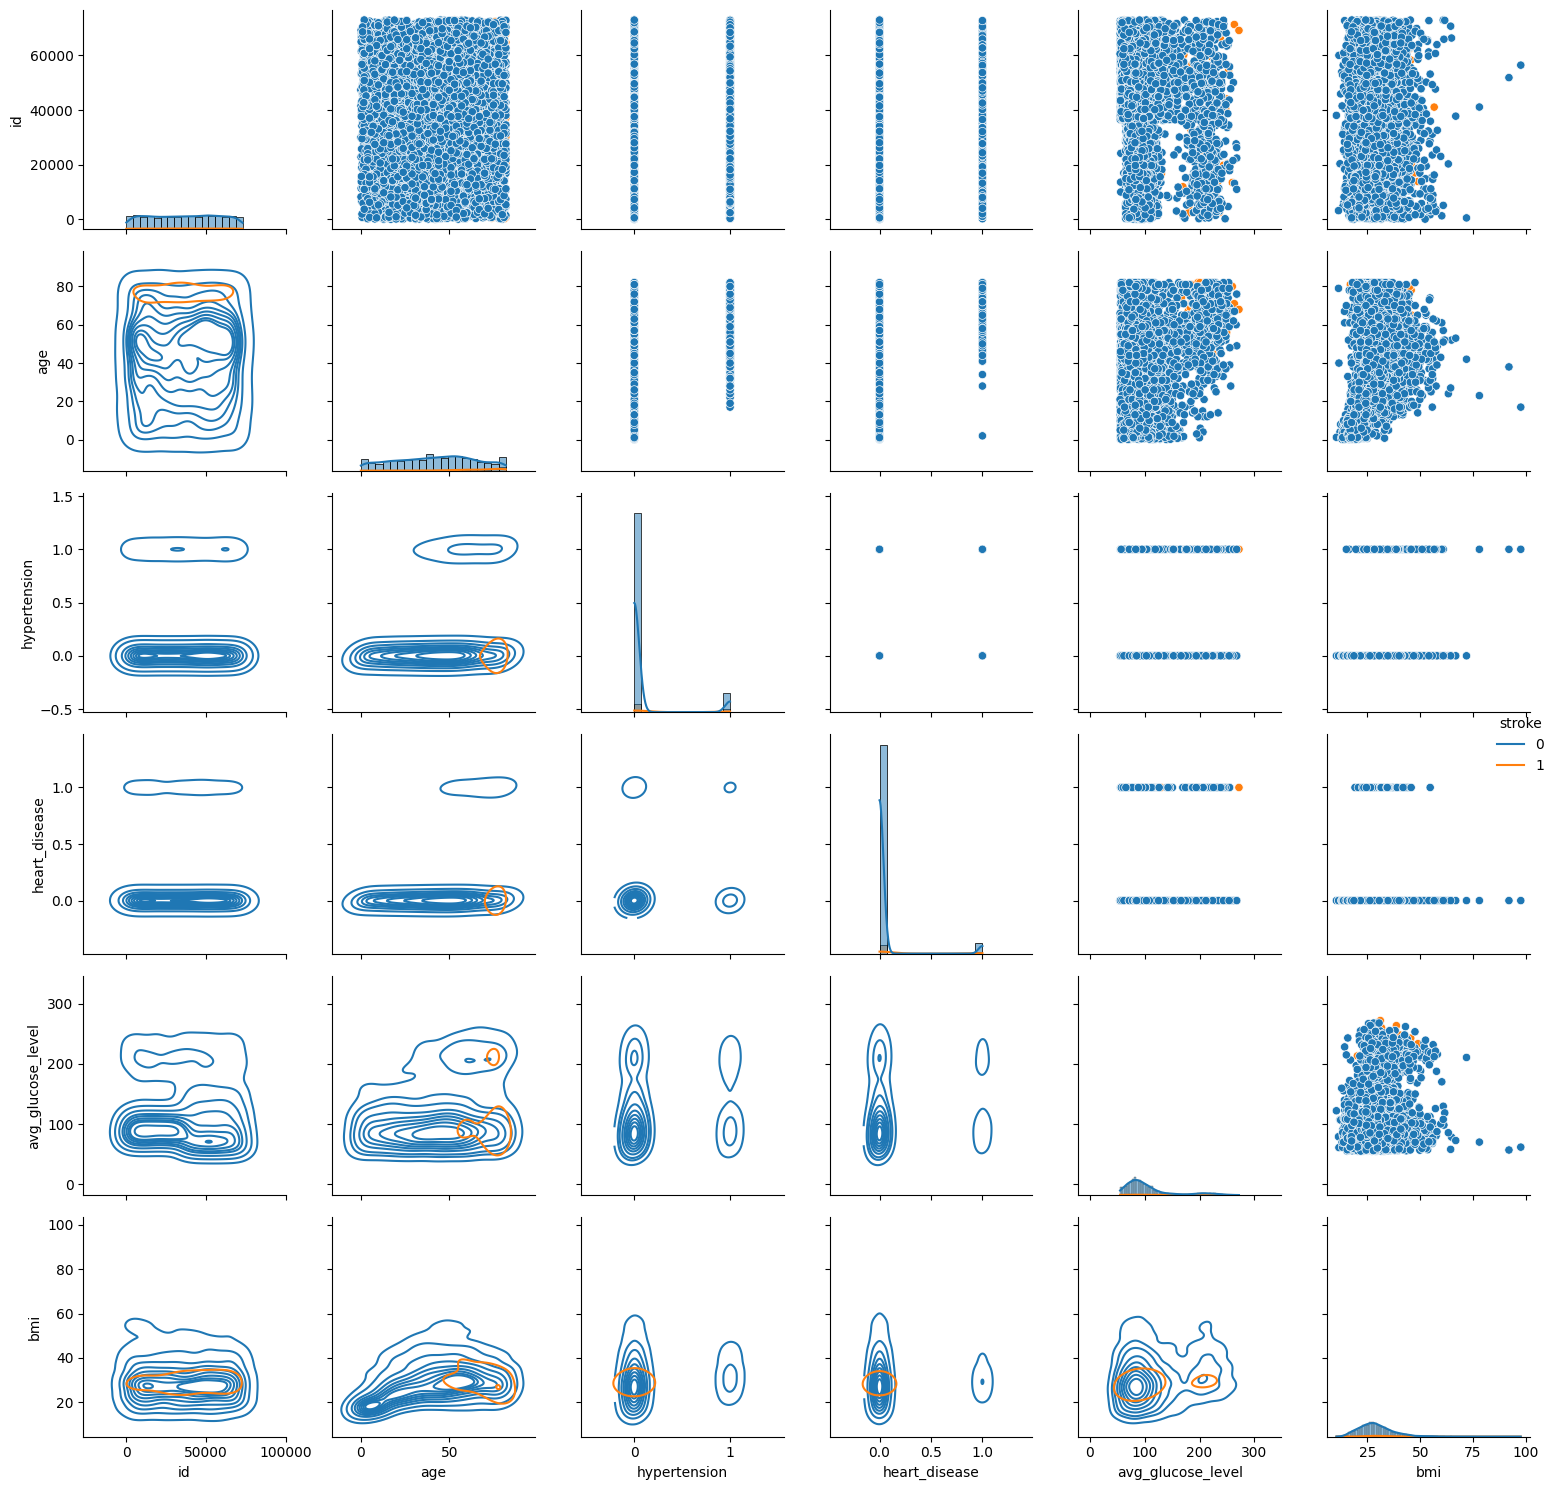

In [ ]:
my_plot = sns.PairGrid(df, hue='stroke')
my_plot.map_upper(sns.scatterplot)
my_plot.map_lower(sns.kdeplot)
my_plot.map_diag(sns.histplot, kde=True, color='k')
my_plot.add_legend()
plt.tight_layout()
plt.show()

# __Missing Values__

In [ ]:
df.inull().sum() s#all other columns have no mising values except bmi where we have 201 missing values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

***
# __4. Pre_processing__
***

### This is the step where we transform the raw data to ensure it is ready to be used for our model

###__Removing uncessary columns__
#### We remove "id" column. The "id" column, containing patient identification numbers, is typically not useful for analysis or modeling because it lacks inherent predictive power and may introduce noise into the data.

In [ ]:
df.drop(columns=['id'], inplace=True)


## __Handling Missing Values__

In [ ]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

In [ ]:
df.isnull().sum() #checking again to see if everything is now good. no more missing values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## __Feature Engineering__

#### __Imbalanced Data__
#### we start feature engineering by looking at and dealing with the imbalanced target classes as we saw in the EDA section.

In [ ]:
df['stroke'].value_counts() # We confirm the actual numbers of the classes of this target column.

0    4861
1     249
Name: stroke, dtype: int64

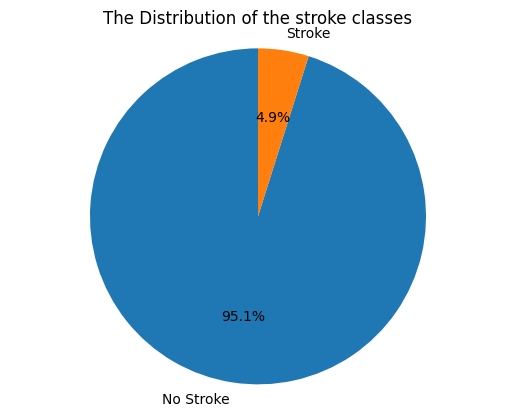

In [ ]:

plt.pie(df['stroke'].value_counts(), labels = ['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of the stroke classes')
plt.show()

### __Random Undersampling__
#### We use the random undersampling technique to ensure that the majority class gets reduced such that the two classes will be balanced in the end. The reason we choase random undersampling over random oversampling is because Random undersampling reduces the computational cost by shrinking the dataset size, making it computationally efficient for model training, and it can help prevent overfitting by reducing the majority class instances. Also, undersampling can reduce the risk of introducing noise into the dataset

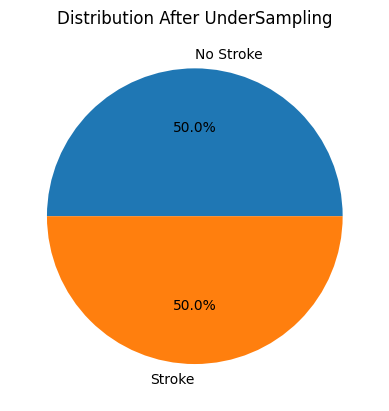

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1)

X = df.drop("stroke", axis=1)  # Features
y = df["stroke"]  # Target variable

X_res, y_res = rus.fit_resample(X,y)

y_res_renamed = y_res.map({0: 'No Stroke', 1: 'Stroke'})

ax = y_res_renamed.value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title("Distribution After UnderSampling")
plt.ylabel('')
plt.show()


###__Binning__
#### Here we perform binning for the age variable since the 'age' variable and our output have no linear relationship

In [ ]:
#Defining the bin edges and labels
bin_edges = [0, 18, 30, 40, 50, 60, float('inf')]  # Defining our age bins as needed
bin_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

#creating a new column with age bins
df['Age_Group'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, right=False)

# droped the original "age" column
df.drop('age', axis=1, inplace=True)

# Display the DataFrame with the new "age_Group" column
df

gender  hypertension  heart_disease ever_married      work_type  \
0       Male             0              1          Yes        Private   
1     Female             0              0          Yes  Self-employed   
2       Male             0              1          Yes        Private   
3     Female             0              0          Yes        Private   
4     Female             1              0          Yes  Self-employed   
...      ...           ...            ...          ...            ...   
5105  Female             1              0          Yes        Private   
5106  Female             0              0          Yes  Self-employed   
5107  Female             0              0          Yes  Self-employed   
5108    Male             0              0          Yes        Private   
5109  Female             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  \
0             Urban             228.69  36.600000  formerly smoked       1   
1             Rural             202.21  28.893237     never smoked       1   
2             Rural             105.92  32.500000     never smoked       1   
3             Urban             171.23  34.400000           smokes       1   
4             Rural             174.12  24.000000     never smoked       1   
...             ...                ...        ...              ...     ...   
5105          Urban              83.75  28.893237     never smoked       0   
5106          Urban             125.20  40.000000     never smoked       0   
5107          Rural              82.99  30.600000     never smoked       0   
5108          Rural             166.29  25.600000  formerly smoked       0   
5109          Urban              85.28  26.200000          Unknown       0   

     Age_Group  
0          61+  
1          61+  
2          61+  
3        41-50  
4          61+  
...        ...  
5105       61+  
5106       61+  
5107     31-40  
5108     51-60  
5109     41-50  

[5110 rows x 11 columns]

## __Encoding Categorical Variables__

In [ ]:
#columns to be one hot encoded
categorical_columns = ["Age_Group","work_type", "smoking_status", "Residence_type", "ever_married", "gender"]

# Performing one-hot encoding for each categorical column
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the DataFrame with one-hot encoding
df_encoded

hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0                0              1             228.69  36.600000       1   
1                0              0             202.21  28.893237       1   
2                0              1             105.92  32.500000       1   
3                0              0             171.23  34.400000       1   
4                1              0             174.12  24.000000       1   
...            ...            ...                ...        ...     ...   
5105             1              0              83.75  28.893237       0   
5106             0              0             125.20  40.000000       0   
5107             0              0              82.99  30.600000       0   
5108             0              0             166.29  25.600000       0   
5109             0              0              85.28  26.200000       0   

      Age_Group_0-18  Age_Group_19-30  Age_Group_31-40  Age_Group_41-50  \
0                  0                0                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                0                1   
4                  0                0                0                0   
...              ...              ...              ...              ...   
5105               0                0                0                0   
5106               0                0                0                0   
5107               0                0                1                0   
5108               0                0                0                0   
5109               0                0                0                1   

      Age_Group_51-60  ...  smoking_status_formerly smoked  \
0                   0  ...                               1   
1                   0  ...                               0   
2                   0  ...                               0   
3                   0  ...                               0   
4                   0  ...                               0   
...               ...  ...                             ...   
5105                0  ...                               0   
5106                0  ...                               0   
5107                0  ...                               0   
5108                1  ...                               1   
5109                0  ...                               0   

      smoking_status_never smoked  smoking_status_smokes  \
0                               0                      0   
1                               1                      0   
2                               1                      0   
3                               0                      1   
4                               1                      0   
...                           ...                    ...   
5105                            1                      0   
5106                            1                      0   
5107                            1                      0   
5108                            0                      0   
5109                            0                      0   

      Residence_type_Rural  Residence_type_Urban  ever_married_No  \
0                        0                     1                0   
1                        1                     0                0   
2                        1                     0                0   
3                        0                     1                0   
4                        1                     0                0   
...                    ...                   ...              ...   
5105                     0                     1                0   
5106                     0                     1                0   
5107                     1                     0                0   
5108                     1                     0

## __Featuring Scaling__

### Decision trees are not affected by the scale of features, so feature scaling is not necessary when using a decision tree.

In [ ]:
#decision trees are not affected by the scale of features, so feature scaling is not necessary when using a decision tree.

## __Data Splitting__

In [ ]:
# Defining features (X) and target variable (y)
X = df_encoded.drop("stroke", axis=1)  # Features
y = df_encoded["stroke"]  # Target variable

# Splitting the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Printing the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_validation shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_validation shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3577, 26)
X_validation shape: (766, 26)
X_test shape: (767, 26)
y_train shape: (3577,)
y_validation shape: (766,)
y_test shape: (767,)


***
# __5. Modelling__
***

## __Model Training__

In [ ]:
# Create a DecisionTreeClassifier instance
classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = classifier.predict(X_val)


## __Model Evaluation__

In [ ]:
# Evaluate the model's accuracy on the validation data
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 0.912532637075718


ROC-AUC Score: 0.5636239613047254

Precision: 0.13043478260869565

Recall: 0.18181818181818182

F1-Score: 0.1518987341772152
CLASSIFACTION REPORT:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       733
           1       0.13      0.18      0.15        33

    accuracy                           0.91       766
   macro avg       0.55      0.56      0.55       766
weighted avg       0.93      0.91      0.92       766


Confusion Matrix:

[[693  40]
 [ 27   6]]


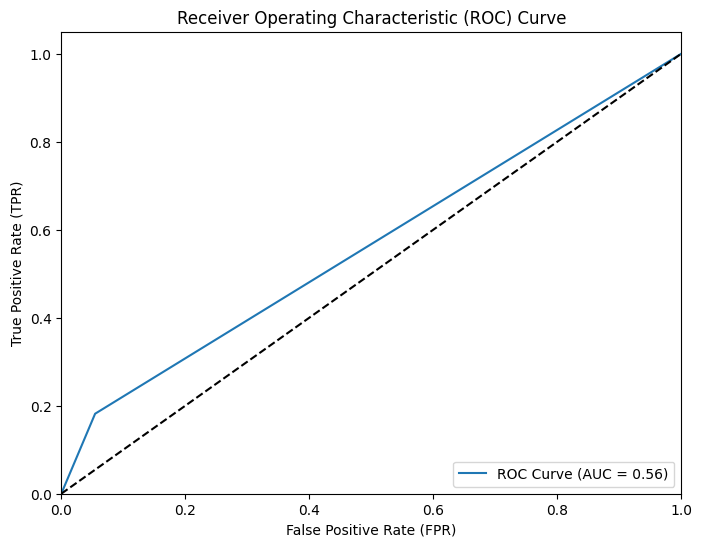

In [ ]:
# Making predictions on the validation data
y_val_pred = classifier.predict(X_val)

# Calculating the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_val_pred)

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

# Calculating precision, recall, and F1-score
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Displaying the ROC-AUC score
print("ROC-AUC Score:", roc_auc)

# Displaying precision, recall, and F1-score
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-Score:", f1)

# Displaying the classification report and confusion matrix
print("CLASSIFACTION REPORT:\n")
print(classification_report(y_val, y_val_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_val, y_val_pred))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## __Hyperparameter Tuning__

In [ ]:


# Defining a dictionary of hyperparameters and their possible values to search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required to be a leaf node
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Creating a GridSearchCV instance to perform hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fitting the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validated accuracy score from the grid search
best_accuracy = grid_search.best_score_
print("Best Cross-Validated Accuracy:", best_accuracy)




Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validated Accuracy: 0.9471629487830604


In [ ]:

# Using the best model for predictions
best_model = grid_search.best_estimator_
y_val_pred_best_model = best_model.predict(X_val)

ROC-AUC Score: 0.5110587457108603
Precision: 0.14285714285714285
Recall: 0.030303030303030304
F1-Score: 0.05
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       733
           1       0.14      0.03      0.05        33

    accuracy                           0.95       766
   macro avg       0.55      0.51      0.51       766
weighted avg       0.92      0.95      0.93       766

Confusion Matrix:
[[727   6]
 [ 32   1]]


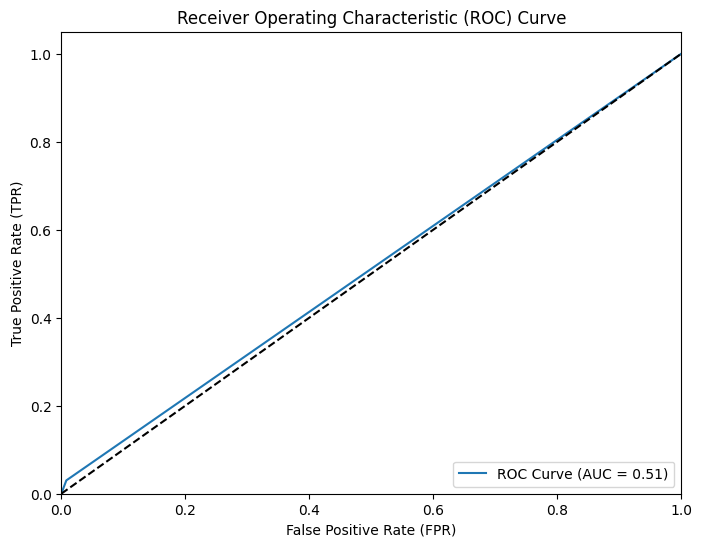

In [ ]:
#reapeating the same proceedure after hyperparater tuning

# Making predictions on the validation data

# Calculating the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_val_pred_best_model)

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_best_model)

# Calculating precision, recall, and F1-score
precision = precision_score(y_val, y_val_pred_best_model)
recall = recall_score(y_val, y_val_pred_best_model)
f1 = f1_score(y_val, y_val_pred_best_model)

# Displaying the ROC-AUC score
print("ROC-AUC Score:", roc_auc)

# Displaying precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Displaying the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val, y_val_pred_best_model))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_best_model))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

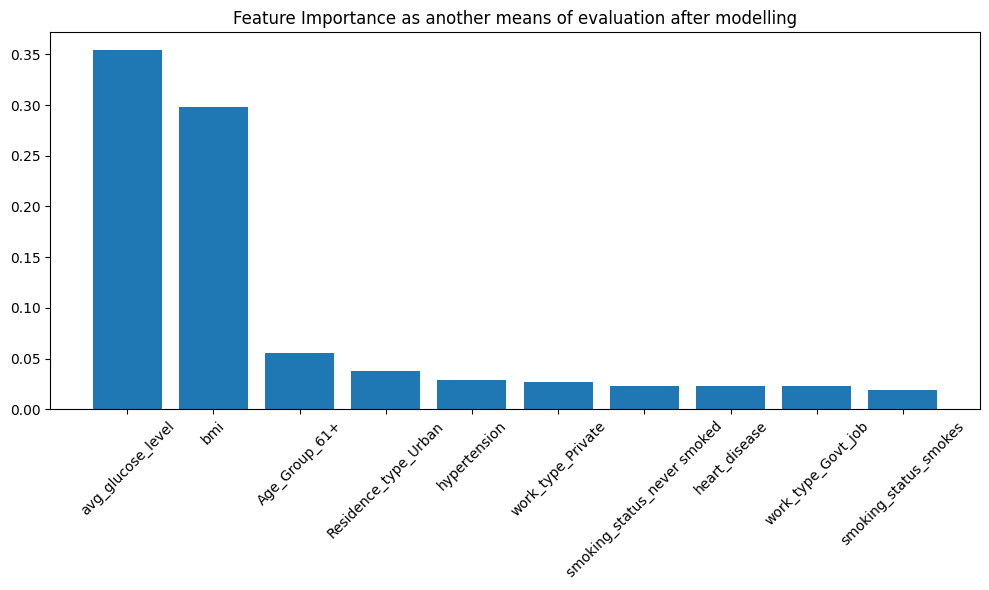

In [ ]:
if hasattr(classifier, 'feature_importances_'):
    feature_importance = classifier.feature_importances_
    sorted_idx = feature_importance.argsort()[::-1]  # Sort in descending order

    # Number of top features to display
    top_n = 10

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance as another means of evaluation after modelling")

    # Plot the top N most important features
    plt.bar(range(top_n), feature_importance[sorted_idx[:top_n]], align="center")
    plt.xticks(range(top_n), X_train.columns[sorted_idx[:top_n]], rotation=45)
    plt.tight_layout()
    plt.show()

__Decision Tree Classifier Summary:__

 This Decision Tree Classifier was trained to predict the likelihood of an individual having a stroke. The tree, comprising root, internal, and leaf nodes, provides insights into the model's decision-making process. Features closer to the root node have a more significant impact on classification, and each leaf node represents a predicted outcome (e.g., "No Stroke" or "Stroke"). The tree's depth reflects the number of decisions made, and measures like Gini Impurity and Entropy assess split quality. This Decision Tree offers transparency into feature importance and helps understand the factors influencing stroke risk prediction, aiding in medical decision support.

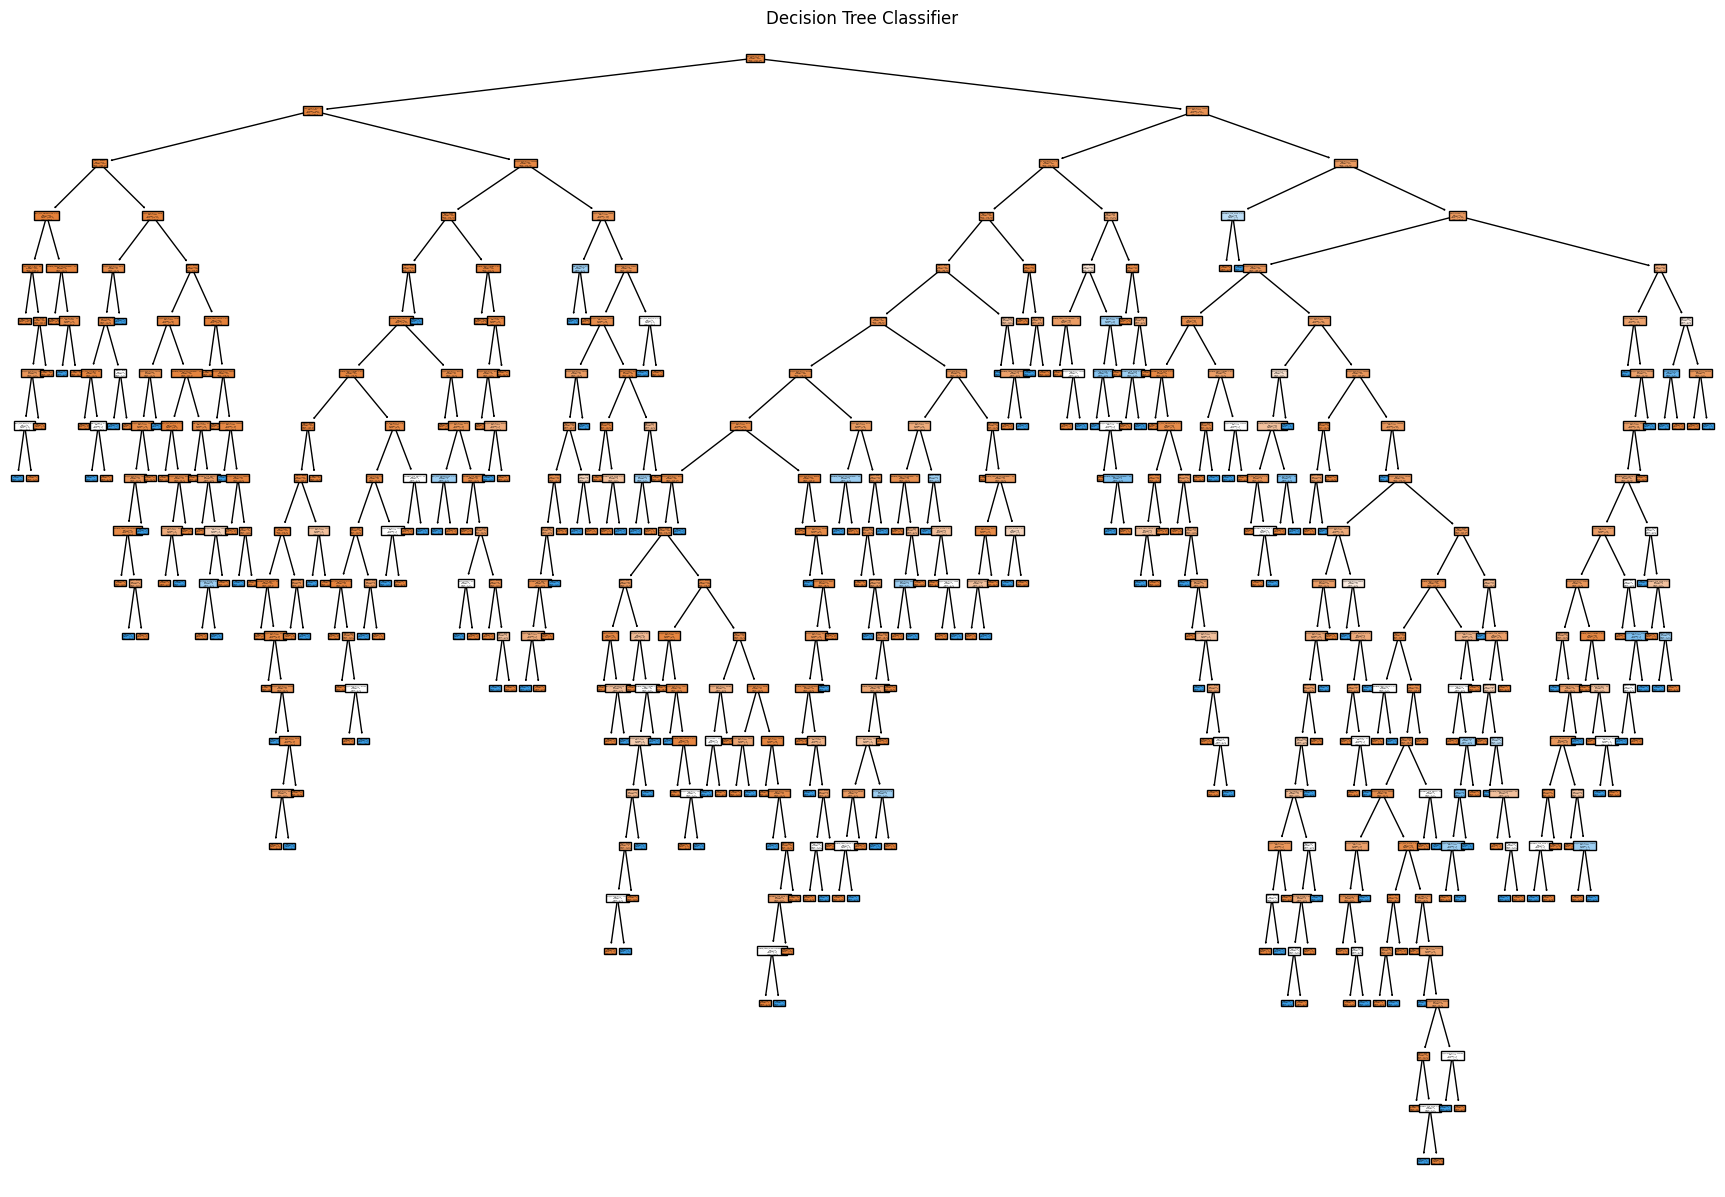

In [ ]:
plt.figure(figsize=(22, 15))  # Adjust the figure size as needed
plot_tree(classifier, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])
plt.title("Decision Tree Classifier")
plt.show()

***
# __6. Conclusion__


***